In [1]:
import pandas as pd
import numpy as np
from kernel import *
from kernel.node import *
from kernel.slot import *
from kernel.transit_data import *
from kernel.graph import *
from kernel.analyzer import *
from kernel.quick import *

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sn
from tqdm import tqdm


from time import sleep

/Users/georgijgurskij/.conda/envs/dqual/lib/python3.9/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
placeholders = [
                    MarketDataPlaceholder('MarketDataPlaceholder')
               ]

In [3]:
market_data = MarketDataHolder('md')
market_data.load('', 'new_set_update')

Traceback (most recent call last):
  File "/Users/georgijgurskij/.conda/envs/dqual/lib/python3.9/site-packages/kernel/transit_data.py", line 149, in _check_data
    assert l == len(self.data[ticker]), ticker + """ data is not homogeneous """
AssertionError: ETC-USDT data is not homogeneous 

Traceback (most recent call last):
  File "/Users/georgijgurskij/.conda/envs/dqual/lib/python3.9/site-packages/kernel/transit_data.py", line 149, in _check_data
    assert l == len(self.data[ticker]), ticker + """ data is not homogeneous """
AssertionError: NEAR-USDT data is not homogeneous 



In [4]:
data = market_data.get_data('midPrice').pct_change()
data.dropna(inplace = True)

In [5]:
from sklearn.covariance import LedoitWolf

In [6]:
from sklearn.covariance import OAS

In [7]:
import nonlinshrink as nls

In [8]:
from sklearn.covariance import ShrunkCovariance

In [9]:
from sklearn.covariance import GraphicalLasso

In [10]:
%pylab
%matplotlib inline

Using matplotlib backend: <object object at 0x7f8145eb5790>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/georgijgurskij/.conda/envs/dqual/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['copy', 'datetime', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [11]:
from pypfopt.risk_models import CovarianceShrinkage

In [12]:
from pypfopt.efficient_frontier import EfficientFrontier

In [13]:
from pypfopt import objective_functions

In [14]:
data

FIL-USDT  AXS-USDT  ETC-USDT  LTC-USDT  ALICE-USDT  \
endRange                                                                  
2021-07-01 01:00:00  0.001572 -0.016360  0.005752 -0.001821    0.006678   
2021-07-01 01:30:00  0.002719  0.020157  0.021154  0.005823    0.012246   
2021-07-01 02:00:00  0.002017 -0.012316 -0.000888  0.001813    0.025835   
2021-07-01 02:30:00 -0.025688 -0.025478 -0.021251 -0.014342   -0.028624   
2021-07-01 03:00:00 -0.006368 -0.013348 -0.014557 -0.004944   -0.015176   
...                       ...       ...       ...       ...         ...   
2021-12-31 22:00:00  0.006940  0.008375  0.007958  0.004883    0.007674   
2021-12-31 22:30:00  0.008388  0.002304  0.002964  0.002943    0.006894   
2021-12-31 23:00:00 -0.003228 -0.003368 -0.002370 -0.003207   -0.006290   
2021-12-31 23:30:00  0.001692  0.001556  0.001408  0.002259    0.005849   
2022-01-01 00:00:00 -0.002622 -0.002410 -0.002373 -0.001332   -0.005416   

                     SAND-USDT  DOT-USDT  ATOM-USDT  LRC-USDT  AVAX-USDT  ...  \
endRange                                                                  ...   
2021-07-01 01:00:00   0.003422 -0.005312  -0.009359  0.002326  -0.001267  ...   
2021-07-01 01:30:00   0.034550  0.007855   0.006156  0.009886   0.010823  ...   
2021-07-01 02:00:00  -0.005403 -0.002280   0.007563  0.006744  -0.002844  ...   
2021-07-01 02:30:00  -0.026517 -0.023033  -0.018132 -0.016849  -0.025502  ...   
2021-07-01 03:00:00  -0.019140 -0.005625  -0.005282 -0.008569  -0.009254  ...   
...                        ...       ...        ...       ...        ...  ...   
2021-12-31 22:00:00   0.005081  0.006309   0.015586  0.023110   0.006746  ...   
2021-12-31 22:30:00  -0.001247  0.001605   0.028615  0.014640   0.014311  ...   
2021-12-31 23:00:00   0.000513 -0.004788   0.014688  0.005370   0.010192  ...   
2021-12-31 23:30:00  -0.000188  0.000824  -0.010370  0.013772  -0.011385  ...   
2022-01-01 00:00:00  -0.001299 -0.003198  -0.004379 -0.015710  -0.007794  ...   

                     ETH-USDT  ICP-USDT  LINK-USDT  SOL-USDT  LUNA-USDT  \
endRange                                                                  
2021-07-01 01:00:00 -0.000020 -0.002550  -0.000705 -0.000610  -0.013908   
2021-07-01 01:30:00  0.005445  0.031598   0.005511  0.001278   0.006504   
2021-07-01 02:00:00  0.000855 -0.002478   0.002338 -0.013837  -0.002180   
2021-07-01 02:30:00 -0.018437 -0.041340  -0.020678 -0.009100  -0.021924   
2021-07-01 03:00:00 -0.009637 -0.019073  -0.009790 -0.007675   0.009413   
...                       ...       ...        ...       ...        ...   
2021-12-31 22:00:00  0.007518  0.010715   0.014369  0.005179   0.009503   
2021-12-31 22:30:00  0.001052  0.002446   0.004637  0.002693  -0.002997   
2021-12-31 23:00:00 -0.002506 -0.003254  -0.006188 -0.005898   0.000843   
2021-12-31 23:30:00  0.000926 -0.000408   0.000000  0.001116  -0.002504   
2022-01-01 00:00:00 -0.002342 -0.003266  -0.004083 -0.002552  -0.004496   

                     MANA-USDT  XTZ-USDT  BTC-USDT  BCH-USDT  DOGE-USDT  
endRange                                                                 
2021-07-01 01:00:00   0.008159 -0.000663 -0.002292 -0.000010  -0.007163  
2021-07-01 01:30:00   0.016011  0.012606  0.004096  0.005964   0.007976  
2021-07-01 02:00:00   0.012076  0.000655  0.001737  0.002773   0.000915  
2021-07-01 02:30:00  -0.037488 -0.013750 -0.012432 -0.017604  -0.021612  
2021-07-01 03:00:00  -0.007034 -0.003320 -0.005848 -0.006834  -0.003512  
...                        ...       ...       ...       ...        ...  
2021-12-31 22:00:00   0.009579  0.012254  0.004992  0.010440   0.006142  
2021-12-31 22:30:00  -0.005047  0.008148  0.001372  0.005563   0.001409  
2021-12-31 23:00:00  -0.003290 -0.003233 -0.001699 -0.000976  -0.003341  
2021-12-31 23:30:00   0.001803  0.009962  0.000866  0.002955   0.003000  
2022-01-01 00:00:00  -0.002944 -0.003900 -0.002755 -0.001879  -0.001466  

[8831 rows x 28 columns]

In [130]:
from arch import arch_model

In [25]:
# Посчитаем рыночную волатильность. отнормируем данные на нее, и затем применим наши модели

In [131]:
garch_vol = []
for col in data.columns:
    garch_test = arch_model(data[col], p = 1, q = 1, mean = 'AR', vol = 'GARCH', dist = 't', rescale = True)
    result = garch_test.fit()
    garch_vol.append(result.conditional_volatility)

Iteration:      1,   Func. Count:      7,   Neg. LLF: 283272.957495864
Iteration:      2,   Func. Count:     18,   Neg. LLF: 133906.53527512937
Iteration:      3,   Func. Count:     26,   Neg. LLF: 11722.897745990977
Iteration:      4,   Func. Count:     33,   Neg. LLF: 8994.463960803409
Iteration:      5,   Func. Count:     40,   Neg. LLF: 9107.814160074302
Iteration:      6,   Func. Count:     47,   Neg. LLF: 12855.030534513462
Iteration:      7,   Func. Count:     56,   Neg. LLF: 9622.685789118344
Iteration:      8,   Func. Count:     63,   Neg. LLF: 9906.161943312576
Iteration:      9,   Func. Count:     70,   Neg. LLF: 8979.758206057219
Iteration:     10,   Func. Count:     77,   Neg. LLF: 9043.498116813038
Iteration:     11,   Func. Count:     84,   Neg. LLF: 9132.398044566715
Iteration:     12,   Func. Count:     91,   Neg. LLF: 8982.538207054335
Iteration:     13,   Func. Count:     98,   Neg. LLF: 8972.027397941707
Iteration:     14,   Func. Count:    105,   Neg. LLF: 9893.291

Iteration:      1,   Func. Count:      7,   Neg. LLF: 61876.73046726903
Iteration:      2,   Func. Count:     18,   Neg. LLF: 49174.794429315734
Iteration:      3,   Func. Count:     29,   Neg. LLF: 14304.259884242054
Iteration:      4,   Func. Count:     36,   Neg. LLF: 304457.1904561495
Iteration:      5,   Func. Count:     43,   Neg. LLF: 17310.760800653625
Iteration:      6,   Func. Count:     50,   Neg. LLF: 12332.039672739396
Iteration:      7,   Func. Count:     57,   Neg. LLF: 17526.391246956955
Iteration:      8,   Func. Count:     65,   Neg. LLF: 12355.684527673347
Iteration:      9,   Func. Count:     72,   Neg. LLF: 12321.890314818615
Iteration:     10,   Func. Count:     78,   Neg. LLF: 12321.877111148411
Iteration:     11,   Func. Count:     84,   Neg. LLF: 12321.875824345336
Iteration:     12,   Func. Count:     90,   Neg. LLF: 12321.875656525533
Iteration:     13,   Func. Count:     96,   Neg. LLF: 12321.87565597066
Optimization terminated successfully    (Exit mode 0)


Iteration:      1,   Func. Count:      7,   Neg. LLF: 202911.7807074304
Iteration:      2,   Func. Count:     16,   Neg. LLF: 137958.36897350877
Iteration:      3,   Func. Count:     24,   Neg. LLF: 9464.993648121455
Iteration:      4,   Func. Count:     31,   Neg. LLF: 8463.58781990783
Iteration:      5,   Func. Count:     38,   Neg. LLF: 14065.045086805634
Iteration:      6,   Func. Count:     45,   Neg. LLF: 8413.40742944128
Iteration:      7,   Func. Count:     52,   Neg. LLF: 8409.886884806063
Iteration:      8,   Func. Count:     59,   Neg. LLF: 8467.109450931775
Iteration:      9,   Func. Count:     66,   Neg. LLF: 8352.478009090564
Iteration:     10,   Func. Count:     73,   Neg. LLF: 8362.751385912014
Iteration:     11,   Func. Count:     81,   Neg. LLF: 8350.467221032755
Iteration:     12,   Func. Count:     88,   Neg. LLF: 8338.153471644911
Iteration:     13,   Func. Count:     94,   Neg. LLF: 8338.034724353121
Iteration:     14,   Func. Count:    100,   Neg. LLF: 8338.07818

Iteration:     12,   Func. Count:     89,   Neg. LLF: 10353.425527965877
Iteration:     13,   Func. Count:     96,   Neg. LLF: 10353.416139897336
Iteration:     14,   Func. Count:    103,   Neg. LLF: 10353.414956777258
Iteration:     15,   Func. Count:    109,   Neg. LLF: 10353.414954678392
Iteration:     16,   Func. Count:    114,   Neg. LLF: 10353.414954678392
Optimization terminated successfully    (Exit mode 0)
            Current function value: 10353.414954678392
            Iterations: 16
            Function evaluations: 114
            Gradient evaluations: 16
Iteration:      1,   Func. Count:      7,   Neg. LLF: 82287.67551065233
Iteration:      2,   Func. Count:     19,   Neg. LLF: 40756.47314592889
Iteration:      3,   Func. Count:     29,   Neg. LLF: 14550.532248677777
Iteration:      4,   Func. Count:     36,   Neg. LLF: 310007.1184089893
Iteration:      5,   Func. Count:     43,   Neg. LLF: 17550.312491948906
Iteration:      6,   Func. Count:     50,   Neg. LLF: 11494.19

In [136]:
garch_vol[10]

endRange
2021-07-01 01:00:00    0.901062
2021-07-01 01:30:00    0.940264
2021-07-01 02:00:00    0.917544
2021-07-01 02:30:00    0.887615
2021-07-01 03:00:00    1.029356
                         ...   
2021-12-31 22:00:00    1.154241
2021-12-31 22:30:00    1.191630
2021-12-31 23:00:00    1.153232
2021-12-31 23:30:00    1.118810
2022-01-01 00:00:00    1.077632
Freq: 30T, Name: cond_vol, Length: 8831, dtype: float64

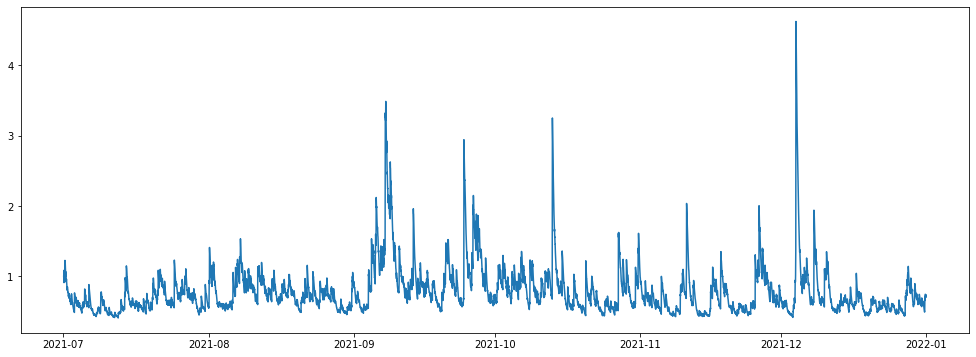

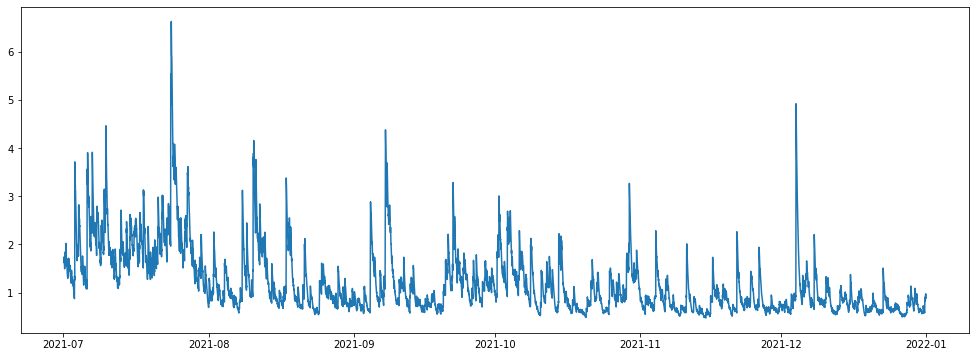

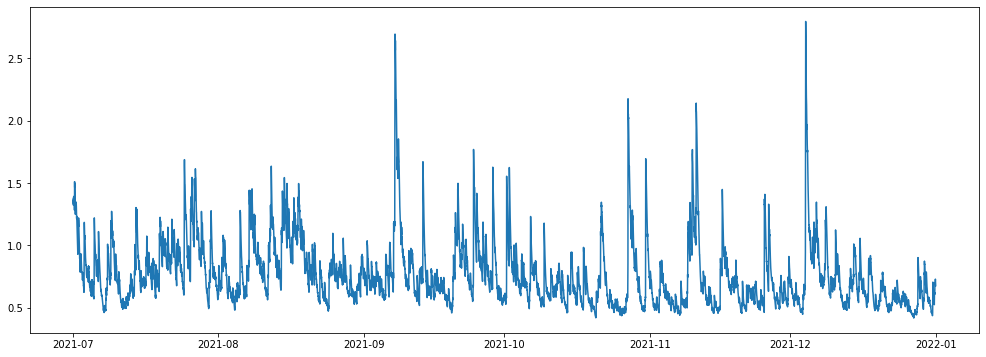

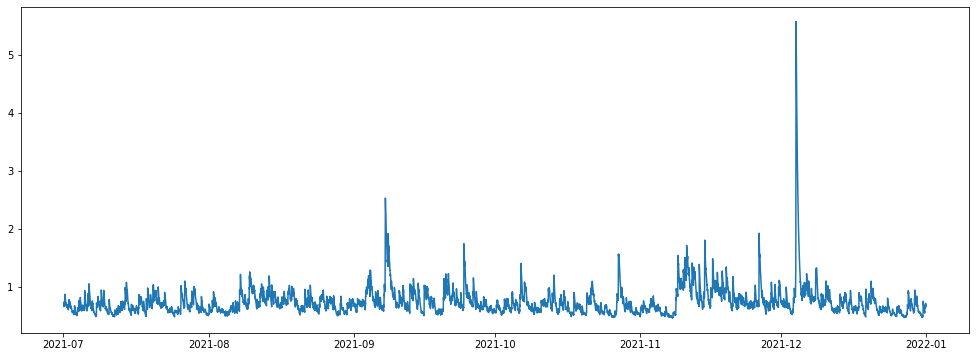

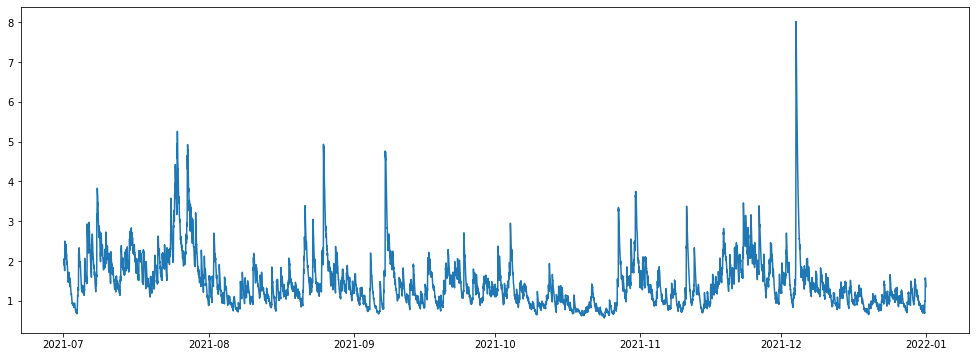

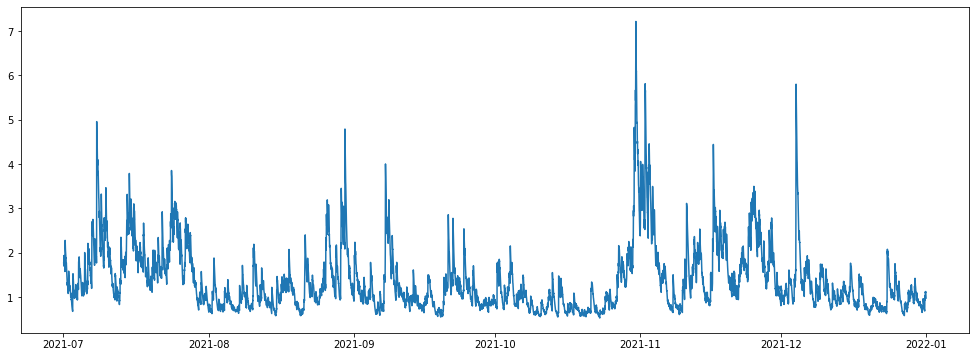

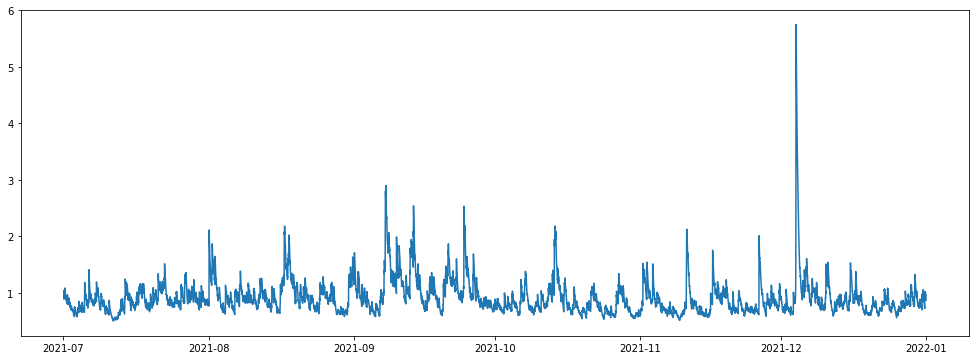

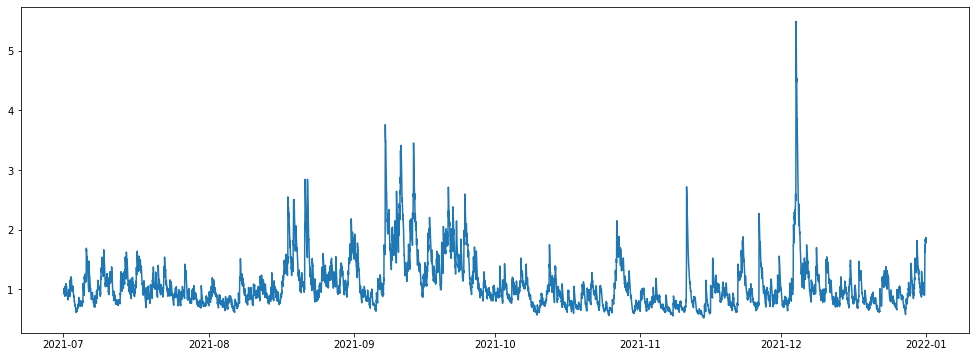

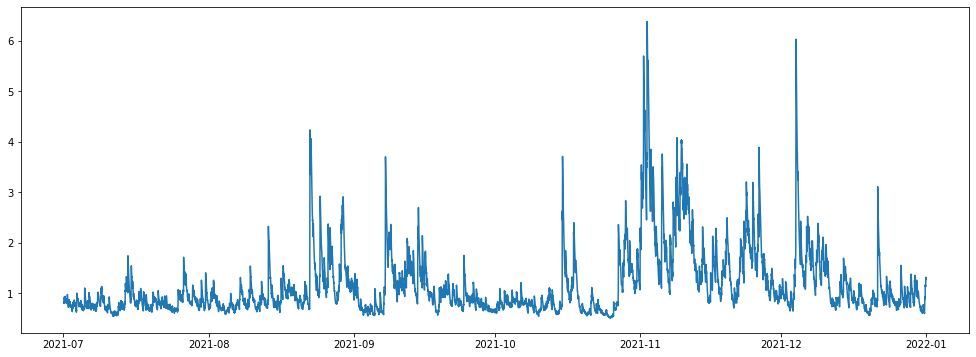

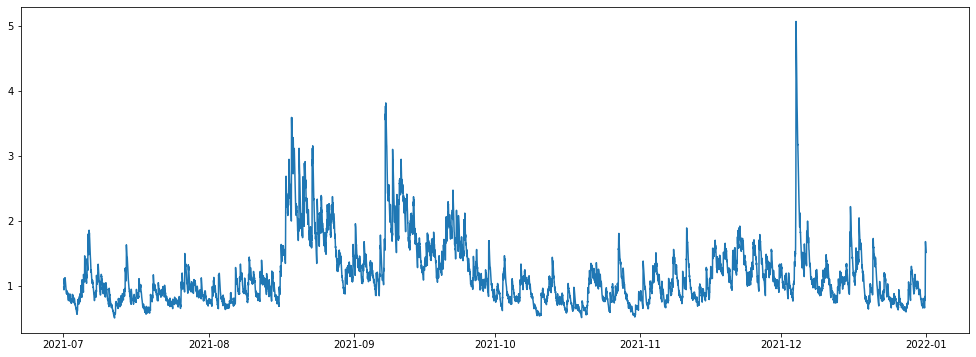

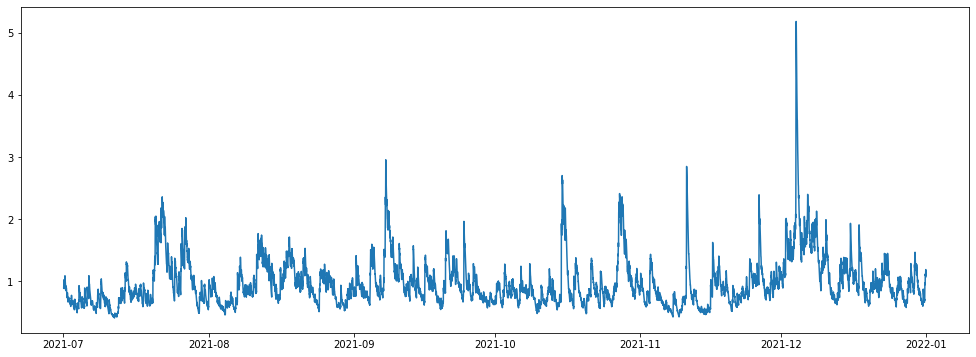

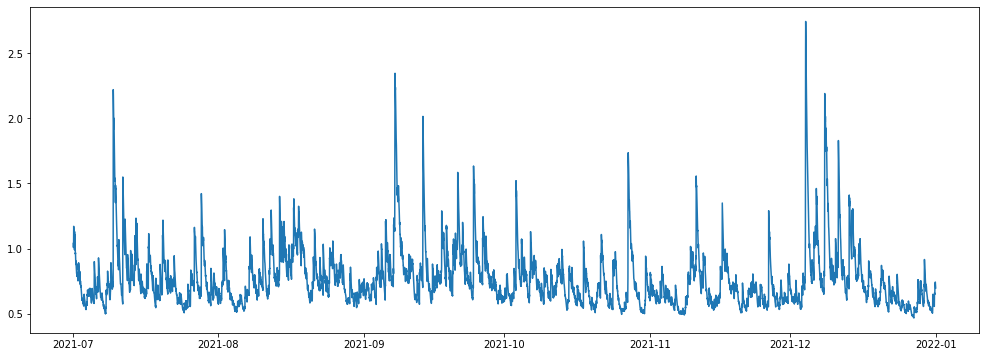

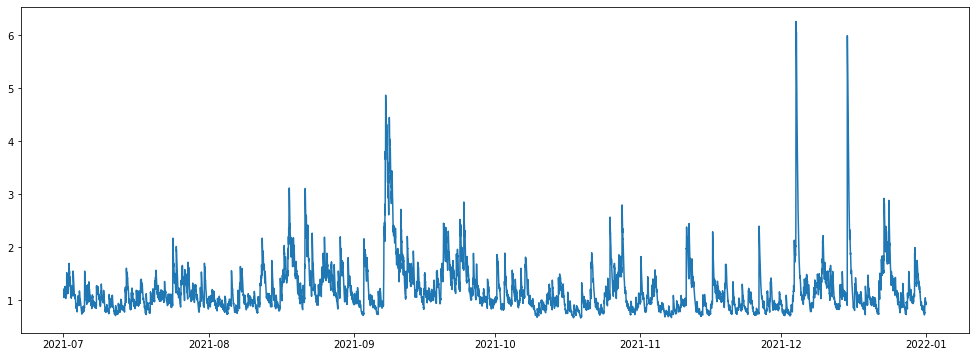

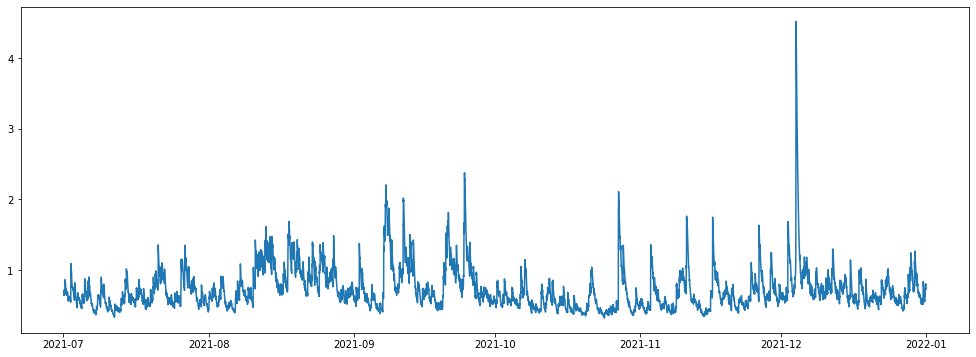

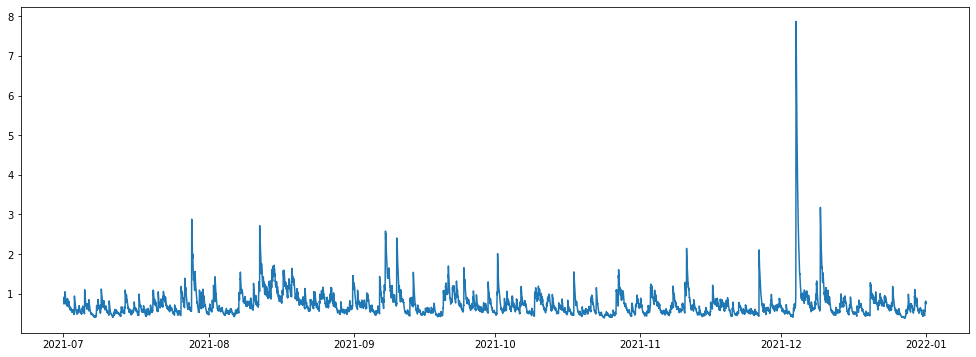

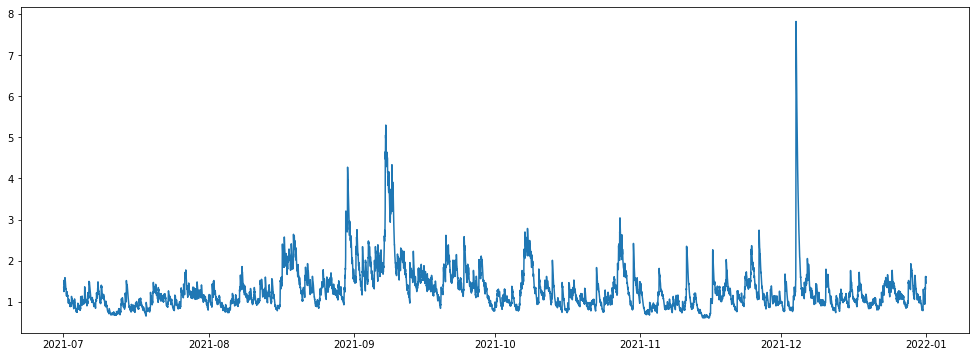

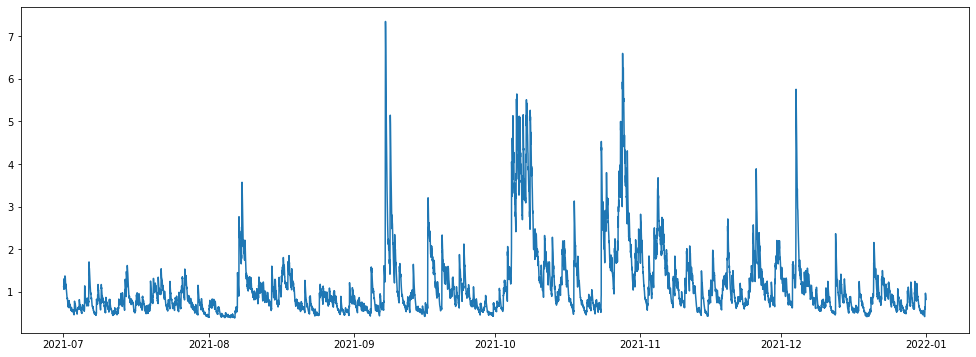

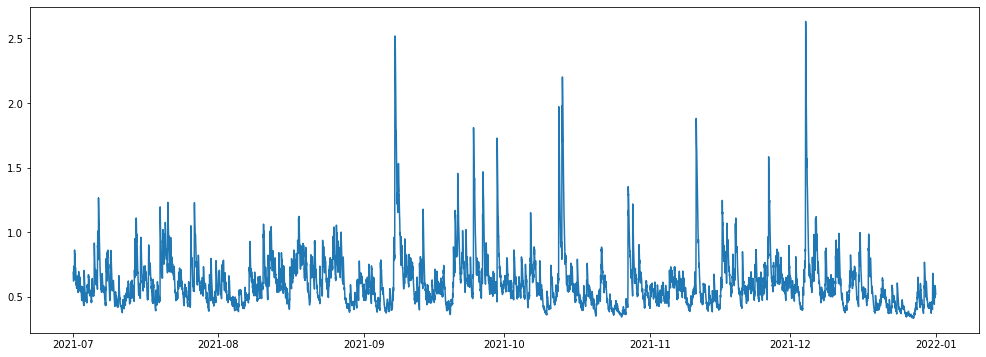

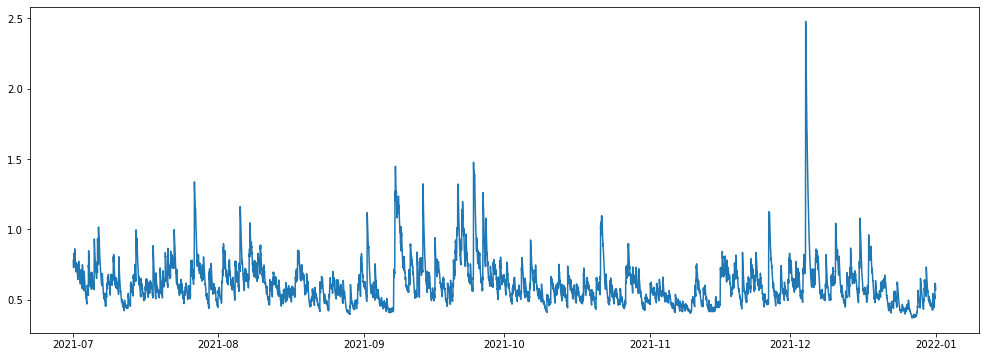

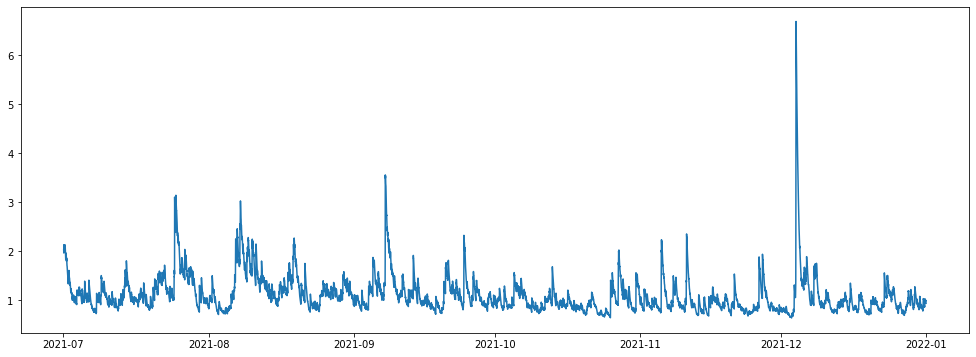

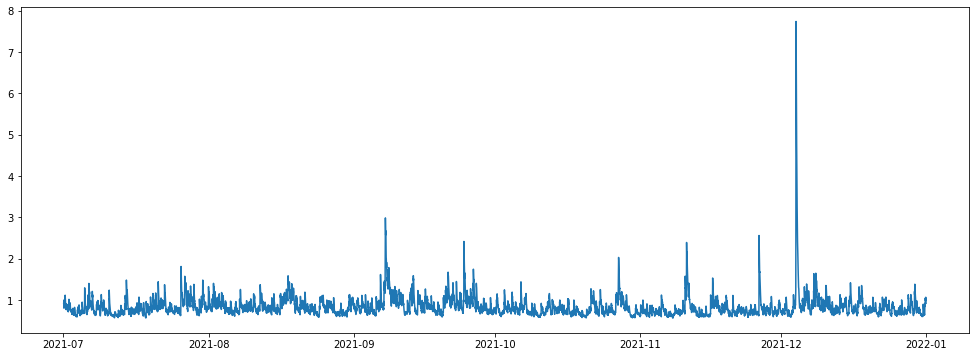

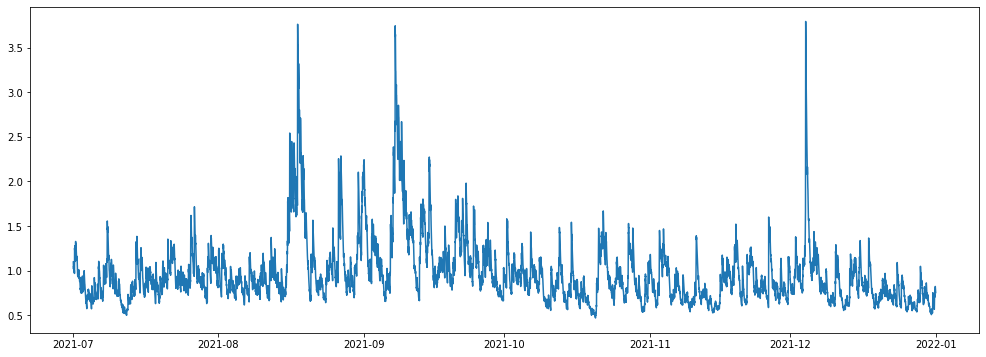

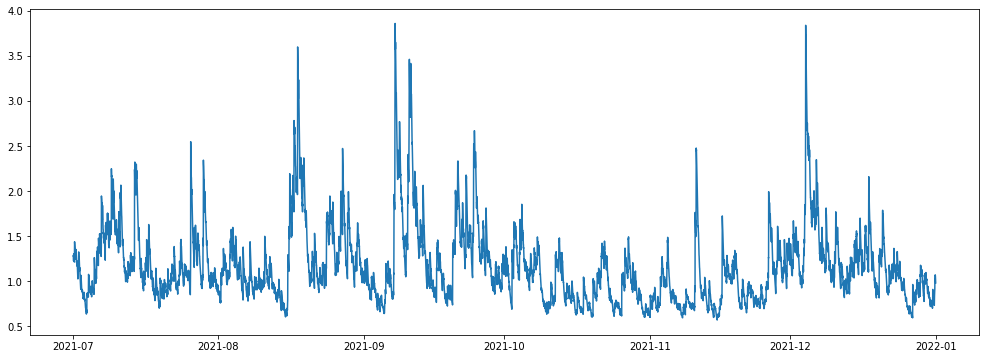

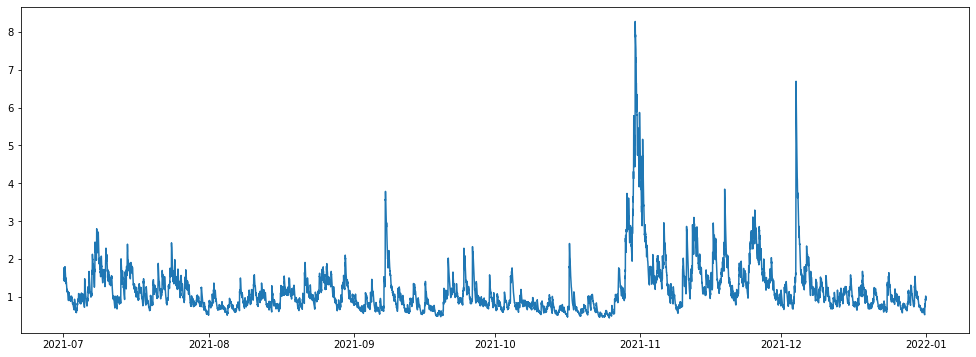

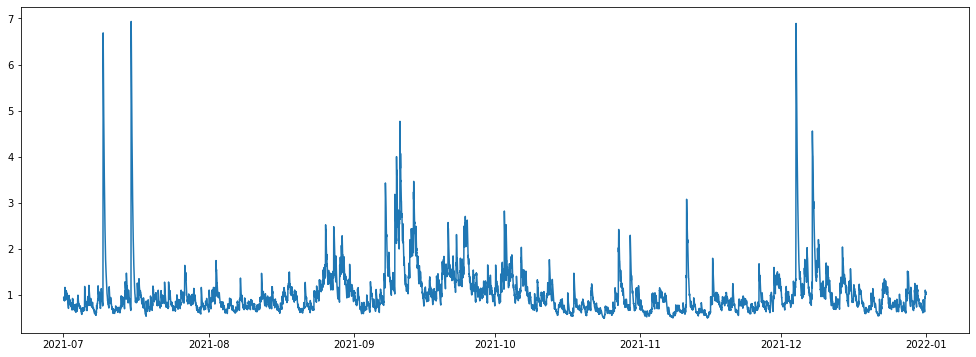

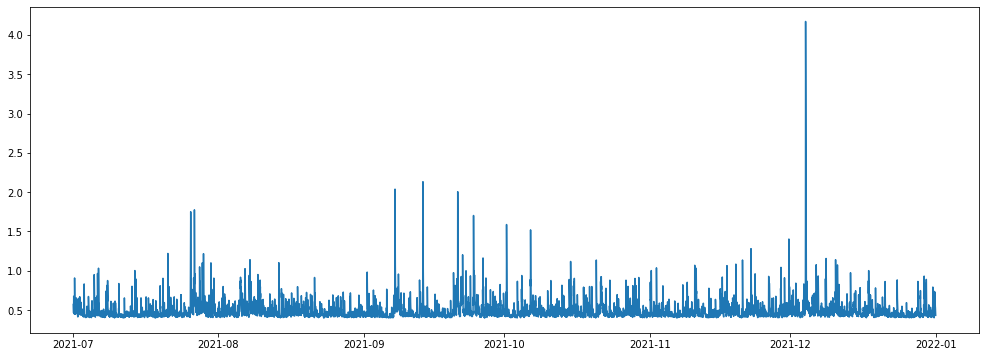

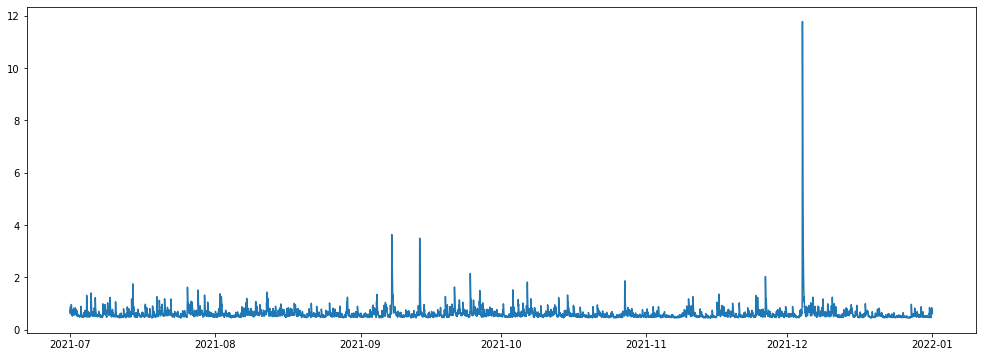

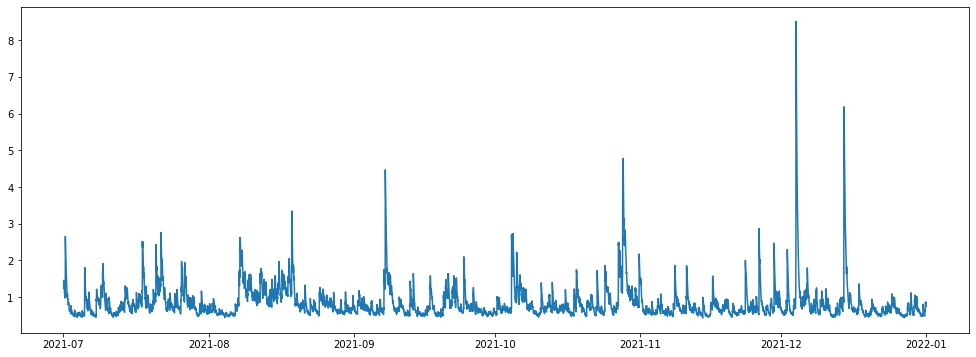

IndexError: list index out of range

<Figure size 1224x432 with 0 Axes>

In [133]:

for i in range(len(data)):

    fig = plt.figure(figsize=(17, 6))

    plot(garch_vol[i])
    plt.show()

In [134]:
cols = list(data.columns) 
for i in tqdm(range(data.shape[1])):
    data[cols[i]] = data[cols[i]] / garch_vol[i]

100%|██████████| 28/28 [00:00<00:00, 1792.68it/s]


In [135]:
data

FIL-USDT  AXS-USDT  ETC-USDT  LTC-USDT  ALICE-USDT  \
endRange                                                                  
2021-07-01 01:00:00  0.001573 -0.010059  0.004221 -0.002607    0.003319   
2021-07-01 01:30:00  0.002810  0.012360  0.015992  0.008562    0.006301   
2021-07-01 02:00:00  0.002148 -0.007374 -0.000642  0.002678    0.013592   
2021-07-01 02:30:00 -0.028204 -0.015526 -0.015936 -0.021737   -0.014547   
2021-07-01 03:00:00 -0.005860 -0.007672 -0.010456 -0.006679   -0.007378   
...                       ...       ...       ...       ...         ...   
2021-12-31 22:00:00  0.009507  0.008605  0.011030  0.006832    0.005054   
2021-12-31 22:30:00  0.011491  0.002378  0.004067  0.004178    0.004662   
2021-12-31 23:00:00 -0.004368 -0.003597 -0.003328 -0.004663   -0.004373   
2021-12-31 23:30:00  0.002342  0.001713  0.002027  0.003354    0.004185   
2022-01-01 00:00:00 -0.003725 -0.002747 -0.003507 -0.002026   -0.003990   

                     SAND-USDT  DOT-USDT  ATOM-USDT  LRC-USDT  AVAX-USDT  ...  \
endRange                                                                  ...   
2021-07-01 01:00:00   0.001933 -0.005624  -0.009959  0.002825  -0.001297  ...   
2021-07-01 01:30:00   0.020335  0.008503   0.006523  0.012365   0.011390  ...   
2021-07-01 02:00:00  -0.002812 -0.002489   0.008157  0.008198  -0.002959  ...   
2021-07-01 02:30:00  -0.014355 -0.025927  -0.019725 -0.020591  -0.027198  ...   
2021-07-01 03:00:00  -0.009891 -0.005380  -0.005199 -0.009266  -0.008332  ...   
...                        ...       ...        ...       ...        ...  ...   
2021-12-31 22:00:00   0.004521  0.006514   0.008680  0.019697   0.004183  ...   
2021-12-31 22:30:00  -0.001142  0.001689   0.016138  0.011245   0.009109  ...   
2021-12-31 23:00:00   0.000488 -0.005208   0.007864  0.004081   0.006525  ...   
2021-12-31 23:30:00  -0.000186  0.000917  -0.005652  0.010828  -0.007423  ...   
2022-01-01 00:00:00  -0.001332 -0.003677  -0.002456 -0.012262  -0.005150  ...   

                     ETH-USDT  ICP-USDT  LINK-USDT  SOL-USDT  LUNA-USDT  \
endRange                                                                  
2021-07-01 01:00:00 -0.000026 -0.001257  -0.000773 -0.000556  -0.010858   
2021-07-01 01:30:00  0.007182  0.016075   0.006380  0.001210   0.005046   
2021-07-01 02:00:00  0.001143 -0.001217   0.002788 -0.013593  -0.001729   
2021-07-01 02:30:00 -0.025340 -0.020957  -0.025788 -0.008665  -0.017887   
2021-07-01 03:00:00 -0.011723 -0.008952  -0.009767 -0.007370   0.007218   
...                       ...       ...        ...       ...        ...   
2021-12-31 22:00:00  0.012530  0.010788   0.013979  0.006299   0.008927   
2021-12-31 22:30:00  0.001726  0.002445   0.004350  0.003334  -0.002825   
2021-12-31 23:00:00 -0.004207 -0.003324  -0.006112 -0.007509   0.000815   
2021-12-31 23:30:00  0.001583 -0.000425   0.000000  0.001436  -0.002487   
2022-01-01 00:00:00 -0.004094 -0.003484  -0.004441 -0.003386  -0.004578   

                     MANA-USDT  XTZ-USDT  BTC-USDT  BCH-USDT  DOGE-USDT  
endRange                                                                 
2021-07-01 01:00:00   0.005536 -0.000712 -0.004017 -0.000013  -0.004927  
2021-07-01 01:30:00   0.011201  0.014114  0.007972  0.008909   0.005770  
2021-07-01 02:00:00   0.008346  0.000700  0.003490  0.004238   0.000691  
2021-07-01 02:30:00  -0.026238 -0.015314 -0.026815 -0.028781  -0.017409  
2021-07-01 03:00:00  -0.003975 -0.003468 -0.008653 -0.007801  -0.002561  
...                        ...       ...       ...       ...        ...  
2021-12-31 22:00:00   0.009417  0.011685  0.009140  0.014749   0.007059  
2021-12-31 22:30:00  -0.004968  0.007634  0.002586  0.007365   0.001659  
2021-12-31 23:00:00  -0.003334 -0.003084 -0.003522 -0.001367  -0.004147  
2021-12-31 23:30:00   0.001893  0.009891  0.001907  0.004538   0.003883  
2022-01-01 00:00:00  -0.003213 -0.003867 -0.006369 -0.003078  -0.001978  

[8831 rows x 28 columns]

In [137]:
win = 150 # окно в 3 дня
win_predict = 150 # окно в 3 дня
# в этих тестах сделаем равные окна для более объективной оценки

# обозначения коэффициентов: _1 - значит мы в прошлом предсказываем на будущее. _2 - веса с будущего засовывем в прошлое

# риски предикта
S_pred_cov_1 = np.array([])
S_pred_LW_1 = np.array([])
S_pred_OAS_1 = np.array([])
S_pred_NLS_1 = np.array([])
S_pred_SH_C_1 = np.array([])
S_pred_pyfopt_LW_1 = np.array([])
S_pred_pyfopt_SF_1 = np.array([])
S_pred_pyfopt_CC_1 = np.array([])
S_pred_EWM_1 = np.array([])

S_pred_cov_2 = np.array([])
S_pred_LW_2 = np.array([])
S_pred_OAS_2 = np.array([])
S_pred_NLS_2 = np.array([])
S_pred_SH_C_2 = np.array([])
S_pred_pyfopt_LW_2 = np.array([])
S_pred_pyfopt_SF_2 = np.array([])
S_pred_pyfopt_CC_2 = np.array([])
S_pred_EWM_2 = np.array([])

# реазизованные риски
S_real_cov_1 = np.array([])
S_real_LW_1 = np.array([])
S_real_OAS_1 = np.array([])
S_real_NLS_1 = np.array([])
S_real_SH_C_1 = np.array([])
S_real_pyfopt_LW_1 = np.array([])
S_real_pyfopt_SF_1 = np.array([])
S_real_pyfopt_CC_1 = np.array([])
S_real_EWM_1 = np.array([])

S_real_cov_2 = np.array([])
S_real_LW_2 = np.array([])
S_real_OAS_2 = np.array([])
S_real_NLS_2 = np.array([])
S_real_SH_C_2 = np.array([])
S_real_pyfopt_LW_2 = np.array([])
S_real_pyfopt_SF_2 = np.array([])
S_real_pyfopt_CC_2 = np.array([])
S_real_EWM_2 = np.array([])

# показатели эффиктивности портфеля. Насколько исселдуемый портфель превосходит в процентах портфель Марковица
# с точки зрения реализованного риска
S_cov_1 = np.array([])
S_LW_1 = np.array([])
S_OAS_1 = np.array([])
S_NLS_1 = np.array([])
S_SH_C_1 = np.array([])
S_pyfopt_LW_1 = np.array([])
S_pyfopt_SF_1 = np.array([])
S_pyfopt_CC_1 = np.array([])
S_EWM_1 = np.array([])

S_cov_2 = np.array([])
S_LW_2 = np.array([])
S_OAS_2 = np.array([])
S_NLS_2 = np.array([])
S_SH_C_2 = np.array([])
S_pyfopt_LW_2 = np.array([])
S_pyfopt_SF_2 = np.array([])
S_pyfopt_CC_2 = np.array([])
S_EWM_2 = np.array([])

# Разница рисков

delta_cov_1 = np.array([])
delta_LW_1 = np.array([])
delta_OAS_1 = np.array([])
delta_NLS_1 = np.array([])
delta_SH_C_1 = np.array([])
delta_pyfopt_LW_1 = np.array([])
delta_pyfopt_SF_1 = np.array([])
delta_pyfopt_CC_1 = np.array([])
delta_EWM_1 = np.array([])

delta_cov_2 = np.array([])
delta_LW_2 = np.array([])
delta_OAS_2 = np.array([])
delta_NLS_2 = np.array([])
delta_SH_C_2 = np.array([])
delta_pyfopt_LW_2 = np.array([])
delta_pyfopt_SF_2 = np.array([])
delta_pyfopt_CC_2 = np.array([])
delta_EWM_2 = np.array([])

# норма разницы весов оценки двумя способами

delta_w_cov = np.array([])
delta_w_LW = np.array([])
delta_w_OAS = np.array([])
delta_w_NLS = np.array([])
delta_w_SH_C = np.array([])
delta_w_pyfopt_LW = np.array([])
delta_w_pyfopt_SF = np.array([])
delta_w_pyfopt_CC = np.array([])
delta_w_EWM = np.array([])

# массивы весов

w_cov_1 = np.array([])
w_LW_1 = np.array([])
w_OAS_1 = np.array([])
w_NLS_1 = np.array([])
w_SH_C_1 = np.array([])
w_pyfopt_LW_1 = np.array([])
w_pyfopt_SF_1 = np.array([])
w_pyfopt_CC_1 = np.array([])
w_EWM_1 = np.array([])

w_cov_2 = np.array([])
w_LW_2 = np.array([])
w_OAS_2 = np.array([])
w_NLS_2 = np.array([])
w_SH_C_2 = np.array([])
w_pyfopt_LW_2 = np.array([])
w_pyfopt_SF_2 = np.array([])
w_pyfopt_CC_2 = np.array([])
w_EWM_2 = np.array([])


for i in tqdm(range(data.shape[0] - (win_predict + win))):
    
    data_empirical = data.iloc[i:i + win]
    
    data_pred = data.iloc[i + win : i + win + win_predict]
    
    # рассчитаем риски предикта и реализованные
    
    
    # обычный cov
    
    # с прошлого в будущее
    
    EF_COV_1 = EfficientFrontier(data_empirical.mean(), data_empirical.cov(), weight_bounds=(-1, 1))
#     EF_COV_1.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_COV_1.add_constraint(lambda x : x <= 0.1)
    EF_COV_1.add_constraint(lambda x : x >= -0.1)
    
    w_m_1 = list(EF_COV_1.min_volatility().values())
    x_m_1 = np.matrix(w_m_1)
    y_1 = np.matrix(data_empirical.mul(win**0.5).cov())
    x_t_m_1 = x_m_1.transpose()
    
    S_pred_cov_1 = np.append(S_pred_cov_1, np.sqrt(np.array(x_m_1 * y_1 * x_t_m_1)[0][0]))
    
    y_m_1 = np.matrix(data_pred.mul(win_predict**0.5).cov())
    
    S_real_cov_1 = np.append(S_real_cov_1, np.sqrt(np.array(x_m_1 * y_m_1 * x_t_m_1)[0][0]))
    
    S_cov_1 = np.append(S_cov_1, 1 - np.sqrt(np.array(x_m_1 * y_m_1 * x_t_m_1)[0][0]) /
                        np.sqrt(np.array(x_m_1 * y_m_1 * x_t_m_1)[0][0]))
    
    delta_cov_1 = np.append(delta_cov_1, abs(np.sqrt(np.array(x_m_1 * y_m_1 * x_t_m_1)[0][0]) - \
                          np.sqrt(np.array(x_m_1 * y_1 * x_t_m_1)[0][0])))
    
    w_cov_1 = np.append(w_cov_1, w_m_1)
    
    # с будущего в прошлое
    
    EF_COV_2 = EfficientFrontier(data_pred.mean(), data_pred.cov(), weight_bounds=(-1, 1))
#     EF_COV_2.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_COV_2.add_constraint(lambda x : x <= 0.1)
    EF_COV_2.add_constraint(lambda x : x >= -0.1)
    
    w_m_2 = list(EF_COV_2.min_volatility().values())
    x_m_2 = np.matrix(w_m_2)
    y_2 = np.matrix(data_pred.mul(win_predict**0.5).cov())
    x_t_m_2 = x_m_2.transpose()
    
    S_real_cov_2 = np.append(S_real_cov_2, np.sqrt(np.array(x_m_2 * y_2 * x_t_m_2)[0][0]))
    # в данном случае real означает риск в будущем, посчитанный там же, а не по данным в прошлом
    y_m_2 = np.matrix(data_empirical.mul(win**0.5).cov())
    
    S_pred_cov_2 = np.append(S_pred_cov_2, np.sqrt(np.array(x_m_2 * y_m_2 * x_t_m_2)[0][0]))
    
    S_cov_2 = np.append(S_cov_2, 1 - np.sqrt(np.array(x_m_2 * y_m_2 * x_t_m_2)[0][0]) /
                        np.sqrt(np.array(x_m_2 * y_m_2 * x_t_m_2)[0][0]))
    
    delta_cov_2 = np.append(delta_cov_2, abs(np.sqrt(np.array(x_m_2 * y_m_2 * x_t_m_2)[0][0]) - \
                          np.sqrt(np.array(x_m_2 * y_2 * x_t_m_2)[0][0])))
    
    delta_w_cov = np.append(delta_w_cov, np.sqrt(((np.array(w_m_2) - np.array(w_m_1)) ** 2).sum()))
    
    w_cov_2 = np.append(w_cov_2, w_m_2)
    
    
#     # LW
    
    LW_emp_1 = LedoitWolf(assume_centered=True).fit(data_empirical.mul(win**0.5))
    LW_emp_cov_1 = LW_emp_1.covariance_
    
    EF_LW_1 = EfficientFrontier(data_empirical.mean(), LW_emp_cov_1, weight_bounds=(-1, 1))
#     EF_LW_1.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_LW_1.add_constraint(lambda x : x <= 0.1)
    EF_LW_1.add_constraint(lambda x : x >= -0.1)
    
    w_1 = list(EF_LW_1.min_volatility().values())
    x_1 = np.matrix(w_1)
    y_1 = np.matrix(LW_emp_cov_1)
    x_t_1 = x_1.transpose()
    
    S_pred_LW_1 = np.append(S_pred_LW_1, np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0]))
    
    y_tmp_1 = np.matrix(data_pred.mul(win_predict**0.5).cov())
    
    S_real_LW_1 = np.append(S_real_LW_1, np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]))
    
    S_LW_1 = np.append(S_LW_1, 1 - np.sqrt(np.array(x_1 * y_m_1 * x_t_1)[0][0]) / 
                       np.sqrt(np.array(x_m_1 * y_m_1 * x_t_m_1)[0][0]))
    
    delta_LW_1 = np.append(delta_LW_1, abs(np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]) - \
                          np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0])))
    
    w_LW_1 = np.append(w_LW_1, w_1)
    
#     # с будущего в прошлое
    
    LW_emp_2 = LedoitWolf(assume_centered=True).fit(data_pred.mul(win_predict**0.5))
    LW_emp_cov_2 = LW_emp_2.covariance_
    
    EF_LW_2 = EfficientFrontier(data_pred.mean(), LW_emp_cov_2, weight_bounds=(-1, 1))
#     EF_LW_2.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_LW_2.add_constraint(lambda x : x <= 0.1)
    EF_LW_2.add_constraint(lambda x : x >= -0.1)
    
    w_2 = list(EF_LW_2.min_volatility().values())
    x_2 = np.matrix(w_2)
    y_2 = np.matrix(LW_emp_cov_2)
    x_t_2 = x_2.transpose()
    
    S_real_LW_2 = np.append(S_real_LW_2, np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0]))
    # в данном случае real означает риск в будущем, посчитанный там же, а не по данным в прошлом
    y_tmp_2 = np.matrix(data_empirical.mul(win**0.5).cov())
    
    S_pred_LW_2 = np.append(S_pred_LW_2, np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]))
    
    S_LW_2 = np.append(S_LW_2, 1 - np.sqrt(np.array(x_2 * y_m_2 * x_t_2)[0][0]) / 
                       np.sqrt(np.array(x_m_2 * y_m_2 * x_t_m_2)[0][0]))
    
    delta_LW_2 = np.append(delta_LW_2, abs(np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]) - \
                          np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0])))
    
    delta_w_LW = np.append(delta_w_LW, np.sqrt(((np.array(w_2) - np.array(w_1)) ** 2).sum()))
    
    w_LW_2 = np.append(w_LW_2, w_2)
    
    # OAS    
    
    OAS_emp_1 = OAS(assume_centered=True).fit(data_empirical.mul(win**0.5))
    OAS_emp_cov_1 = OAS_emp_1.covariance_
    
    EF_OAS_1 = EfficientFrontier(data_empirical.mean(), OAS_emp_cov_1, weight_bounds=(-1, 1))
#     EF_OAS_1.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_OAS_1.add_constraint(lambda x : x <= 0.1)
    EF_OAS_1.add_constraint(lambda x : x >= -0.1)
    
    w_1 = list(EF_OAS_1.min_volatility().values())
    x_1 = np.matrix(w_1)
    y_1 = np.matrix(OAS_emp_cov_1)
    x_t_1 = x_1.transpose()
    
    S_pred_OAS_1 = np.append(S_pred_OAS_1, np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0]))
    
    y_tmp_1 = np.matrix(data_pred.mul(win_predict**0.5).cov())
    
    S_real_OAS_1 = np.append(S_real_OAS_1, np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]))
    
    S_OAS_1 = np.append(S_OAS_1, 1 - np.sqrt(np.array(x_1 * y_m_1 * x_t_1)[0][0]) / 
                        np.sqrt(np.array(x_m_1 * y_m_1 * x_t_m_1)[0][0]))
        
    delta_OAS_1 = np.append(delta_OAS_1, abs(np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]) - \
                          np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0])))
    
    w_OAS_1 = np.append(w_OAS_1, w_1)
    
    # с будущего в прошлое
    
    OAS_emp_2 = OAS(assume_centered=True).fit(data_pred.mul(win_predict**0.5))
    OAS_emp_cov_2 = OAS_emp_2.covariance_
    
    EF_OAS_2 = EfficientFrontier(data_pred.mean(), OAS_emp_cov_2, weight_bounds=(-1, 1))
#     EF_OAS_2.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_OAS_2.add_constraint(lambda x : x <= 0.1)
    EF_OAS_2.add_constraint(lambda x : x >= -0.1)
    
    w_2 = list(EF_OAS_2.min_volatility().values())
    x_2 = np.matrix(w_2)
    y_2 = np.matrix(OAS_emp_cov_2)
    x_t_2 = x_2.transpose()
    
    S_real_OAS_2 = np.append(S_real_OAS_2, np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0]))
    # в данном случае real означает риск в будущем, посчитанный там же, а не по данным в прошлом
    y_tmp_2 = np.matrix(data_empirical.mul(win**0.5).cov())
    
    S_pred_OAS_2 = np.append(S_pred_OAS_2, np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]))
    
    S_OAS_2 = np.append(S_OAS_2, 1 - np.sqrt(np.array(x_2 * y_m_2 * x_t_2)[0][0]) / 
                       np.sqrt(np.array(x_m_2 * y_m_2 * x_t_m_2)[0][0]))
    
    delta_OAS_2 = np.append(delta_OAS_2, abs(np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]) - \
                          np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0])))
    
    delta_w_OAS = np.append(delta_w_OAS, np.sqrt(((np.array(w_2) - np.array(w_1)) ** 2).sum()))
    
    w_OAS_2 = np.append(w_OAS_2, w_2)
    
    # NLS
    
    NLS_emp_cov_1 = nls.shrink_cov(data_empirical.mul(win**0.5))
    
    EF_NLS_1 = EfficientFrontier(data_empirical.mean(), NLS_emp_cov_1, weight_bounds=(-1, 1))
#     EF_NLS_1.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_NLS_1.add_constraint(lambda x : x <= 0.1)
    EF_NLS_1.add_constraint(lambda x : x >= -0.1)
    
    w_1 = list(EF_NLS_1.min_volatility().values())
    x_1 = np.matrix(w_1)
    y_1 = np.matrix(NLS_emp_cov_1)
    x_t_1 = x_1.transpose()
    
    S_pred_NLS_1 = np.append(S_pred_NLS_1, np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0]))
    
    y_tmp_1 = np.matrix(data_pred.mul(win_predict**0.5).cov())
    
    S_real_NLS_1 = np.append(S_real_NLS_1, np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]))
    
    S_NLS_1 = np.append(S_NLS_1, 1 - np.sqrt(np.array(x_1 * y_m_1 * x_t_1)[0][0]) / 
                        np.sqrt(np.array(x_m_1 * y_m_1 * x_t_m_1)[0][0]))
    
    delta_NLS_1 = np.append(delta_NLS_1, abs(np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]) - \
                          np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0])))
    
    w_NLS_1 = np.append(w_NLS_1, w_1)
    
#     # с будущего в прошлое
    
    NLS_emp_cov_2 = nls.shrink_cov(data_pred.mul(win_predict**0.5))
    
    EF_NLS_2 = EfficientFrontier(data_pred.mean(), NLS_emp_cov_2, weight_bounds=(-1, 1))
#     EF_NLS_2.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_NLS_2.add_constraint(lambda x : x <= 0.1)
    EF_NLS_2.add_constraint(lambda x : x >= -0.1)
    
    w_2 = list(EF_NLS_2.min_volatility().values())
    x_2 = np.matrix(w_2)
    y_2 = np.matrix(NLS_emp_cov_2)
    x_t_2 = x_2.transpose()
    
    S_real_NLS_2 = np.append(S_real_NLS_2, np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0]))
    # в данном случае real означает риск в будущем, посчитанный там же, а не по данным в прошлом
    y_tmp_2 = np.matrix(data_empirical.mul(win**0.5).cov())
    
    S_pred_NLS_2 = np.append(S_pred_NLS_2, np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]))
    
    S_NLS_2 = np.append(S_NLS_2, 1 - np.sqrt(np.array(x_2 * y_m_2 * x_t_2)[0][0]) / 
                       np.sqrt(np.array(x_m_2 * y_m_2 * x_t_m_2)[0][0]))
    
    delta_NLS_2 = np.append(delta_NLS_2, abs(np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]) - \
                          np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0])))
    
    delta_w_NLS = np.append(delta_w_NLS, np.sqrt(((np.array(w_2) - np.array(w_1)) ** 2).sum()))
    
    w_NLS_2 = np.append(w_NLS_2, w_2)
    
    # Shr with coef
    
    SH_C_emp_1 = ShrunkCovariance(assume_centered = True, shrinkage=0.1).fit(data_empirical.mul(win**0.5))
    SH_C_emp_cov_1 = SH_C_emp_1.covariance_
    
    EF_SH_C_1 = EfficientFrontier(data_empirical.mean(), SH_C_emp_cov_1, weight_bounds=(-1, 1))
#     EF_SH_C_1.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_SH_C_1.add_constraint(lambda x : x <= 0.1)
    EF_SH_C_1.add_constraint(lambda x : x >= -0.1)
    
    w_1 = list(EF_SH_C_1.min_volatility().values())
    x_1 = np.matrix(w_1)
    y_1 = np.matrix(SH_C_emp_cov_1)
    x_t_1 = x_1.transpose()
    
    S_pred_SH_C_1 = np.append(S_pred_SH_C_1, np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0]))
    
    y_tmp_1 = np.matrix(data_pred.mul(win_predict**0.5).cov())
    
    S_real_SH_C_1 = np.append(S_real_SH_C_1, np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]))
    
    S_SH_C_1 = np.append(S_SH_C_1, 1 - np.sqrt(np.array(x_1 * y_m_1 * x_t_1)[0][0]) / 
                         np.sqrt(np.array(x_m_1 * y_m_1 * x_t_m_1)[0][0]))
    
    delta_SH_C_1 = np.append(delta_SH_C_1, abs(np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]) - \
                          np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0])))
    
    w_SH_C_1 = np.append(w_SH_C_1, w_1)
    
    # с будущего в прошлое
    
    SH_C_emp_2 = ShrunkCovariance(assume_centered = True, shrinkage=0.05).fit(data_pred.mul(win_predict**0.5))
    SH_C_emp_cov_2 = SH_C_emp_2.covariance_
    
    EF_SH_C_2 = EfficientFrontier(data_pred.mean(), SH_C_emp_cov_2, weight_bounds=(-1, 1))
#     EF_SH_C_2.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_SH_C_2.add_constraint(lambda x : x <= 0.1)
    EF_SH_C_2.add_constraint(lambda x : x >= -0.1)
    
    w_2 = list(EF_SH_C_2.min_volatility().values())
    x_2 = np.matrix(w_2)
    y_2 = np.matrix(SH_C_emp_cov_2)
    x_t_2 = x_2.transpose()
    
    S_real_SH_C_2 = np.append(S_real_SH_C_2, np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0]))
    # в данном случае real означает риск в будущем, посчитанный там же, а не по данным в прошлом
    y_tmp_2 = np.matrix(data_empirical.mul(win**0.5).cov())
    
    S_pred_SH_C_2 = np.append(S_pred_SH_C_2, np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]))
    
    S_SH_C_2 = np.append(S_SH_C_2, 1 - np.sqrt(np.array(x_2 * y_m_2 * x_t_2)[0][0]) / 
                       np.sqrt(np.array(x_m_2 * y_m_2 * x_t_m_2)[0][0]))
    
    delta_SH_C_2 = np.append(delta_SH_C_2, abs(np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]) - \
                          np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0])))
    
    delta_w_SH_C = np.append(delta_w_SH_C, np.sqrt(((np.array(w_2) - np.array(w_1)) ** 2).sum()))
    
    w_SH_C_2 = np.append(w_SH_C_2, w_2)
    
    # Pyfopt LW
    
    S_pyfopt_emp_cov_LW_1 = CovarianceShrinkage(data_empirical.mul(win**0.5), returns_data = True, frequency = win).ledoit_wolf()
    S_pyfopt_emp_cov_LW_1 /= win # == win
    
    EF_pyfopt_LW_1 = EfficientFrontier(data_empirical.mean(), S_pyfopt_emp_cov_LW_1, weight_bounds=(-1, 1))
#     EF_pyfopt_LW_1.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_pyfopt_LW_1.add_constraint(lambda x : x <= 0.1)
    EF_pyfopt_LW_1.add_constraint(lambda x : x >= -0.1)
    
    w_1 = list(EF_pyfopt_LW_1.min_volatility().values())
    x_1 = np.matrix(w_1)
    y_1 = np.matrix(S_pyfopt_emp_cov_LW_1)
    x_t_1 = x_1.transpose()
    
    S_pred_pyfopt_LW_1 = np.append(S_pred_pyfopt_LW_1, np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0]))
    
    y_tmp_1 = np.matrix(data_pred.mul(win_predict**0.5).cov())
    
    S_real_pyfopt_LW_1 = np.append(S_real_pyfopt_LW_1, np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]))
    
    S_pyfopt_LW_1 = np.append(S_pyfopt_LW_1, 1 - np.sqrt(np.array(x_1 * y_m_1 * x_t_1)[0][0]) / 
                              np.sqrt(np.array(x_m_1 * y_m_1 * x_t_m_1)[0][0]))
    
    delta_pyfopt_LW_1 = np.append(delta_pyfopt_LW_1, abs(np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]) - \
                                  np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0])))
    
    w_pyfopt_LW_1 = np.append(w_pyfopt_LW_1, w_1)
    
    # с будущего в прошлое
    
    S_pyfopt_emp_cov_LW_2 = CovarianceShrinkage(data_pred.mul(win_predict**0.5), returns_data = True, frequency = win).ledoit_wolf()
    S_pyfopt_emp_cov_LW_2 /= win
    
    EF_pyfopt_LW_2 = EfficientFrontier(data_pred.mean(), S_pyfopt_emp_cov_LW_2, weight_bounds=(-1, 1))
#     EF_pyfopt_LW_2.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_pyfopt_LW_2.add_constraint(lambda x : x <= 0.1)
    EF_pyfopt_LW_2.add_constraint(lambda x : x >= -0.1)
    
    w_2 = list(EF_pyfopt_LW_2.min_volatility().values())
    x_2 = np.matrix(w_2)
    y_2 = np.matrix(S_pyfopt_emp_cov_LW_2)
    x_t_2 = x_2.transpose()
    
    S_real_pyfopt_LW_2 = np.append(S_real_pyfopt_LW_2, np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0]))
    # в данном случае real означает риск в будущем, посчитанный там же, а не по данным в прошлом
    y_tmp_2 = np.matrix(data_empirical.mul(win**0.5).cov())
    
    S_pred_pyfopt_LW_2 = np.append(S_pred_pyfopt_LW_2, np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]))
    
    S_pyfopt_LW_2 = np.append(S_pyfopt_LW_2, 1 - np.sqrt(np.array(x_2 * y_m_2 * x_t_2)[0][0]) / 
                       np.sqrt(np.array(x_m_2 * y_m_2 * x_t_m_2)[0][0]))
    
    delta_pyfopt_LW_2 = np.append(delta_pyfopt_LW_2, abs(np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]) - \
                          np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0])))
    
    delta_w_pyfopt_LW = np.append(delta_w_pyfopt_LW, np.sqrt(((np.array(w_2) - np.array(w_1)) ** 2).sum()))
    
    w_pyfopt_LW_2 = np.append(w_pyfopt_LW_2, w_2)
    
    # Pyfopt single factor
    
    S_pyfopt_emp_cov_SF_1 = CovarianceShrinkage(data_empirical.mul(win**0.5), returns_data = True, frequency = win).ledoit_wolf(shrinkage_target = 'single_factor')
    S_pyfopt_emp_cov_SF_1 /= win
    
    EF_pyfopt_SF_1 = EfficientFrontier(data_empirical.mean(), S_pyfopt_emp_cov_SF_1, weight_bounds=(-1, 1))
#     EF_pyfopt_SF_1.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_pyfopt_SF_1.add_constraint(lambda x : x <= 0.1)
    EF_pyfopt_SF_1.add_constraint(lambda x : x >= -0.1)
    
    w_1 = list(EF_pyfopt_SF_1.min_volatility().values())
    x_1 = np.matrix(w_1)
    y_1 = np.matrix(S_pyfopt_emp_cov_SF_1)
    x_t_1 = x_1.transpose()
    
    S_pred_pyfopt_SF_1 = np.append(S_pred_pyfopt_SF_1, np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0]))
    
    y_tmp_1 = np.matrix(data_pred.mul(win_predict**0.5).cov())
    
    S_real_pyfopt_SF_1 = np.append(S_real_pyfopt_SF_1, np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]))
    
    S_pyfopt_SF_1 = np.append(S_pyfopt_SF_1, 1 - np.sqrt(np.array(x_1 * y_m_1 * x_t_1)[0][0]) / 
                              np.sqrt(np.array(x_m_1 * y_m_1 * x_t_m_1)[0][0]))
    
    delta_pyfopt_SF_1 = np.append(delta_pyfopt_SF_1, abs(np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]) - \
                                  np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0])))
    
    w_pyfopt_SF_1 = np.append(w_pyfopt_SF_1, w_1)
    
    # с будущего в прошлое
    
    S_pyfopt_emp_cov_SF_2 = CovarianceShrinkage(data_pred.mul(win_predict**0.5), returns_data = True, frequency = win).ledoit_wolf(shrinkage_target = 'single_factor')
    S_pyfopt_emp_cov_SF_2 /= win
    
    EF_pyfopt_SF_2 = EfficientFrontier(data_pred.mean(), S_pyfopt_emp_cov_SF_2, weight_bounds=(-1, 1))
#     EF_pyfopt_SF_2.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_pyfopt_SF_2.add_constraint(lambda x : x <= 0.1)
    EF_pyfopt_SF_2.add_constraint(lambda x : x >= -0.1)
    
    w_2 = list(EF_pyfopt_SF_2.min_volatility().values())
    x_2 = np.matrix(w_2)
    y_2 = np.matrix(S_pyfopt_emp_cov_SF_2)
    x_t_2 = x_2.transpose()
    
    S_real_pyfopt_SF_2 = np.append(S_real_pyfopt_SF_2, np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0]))
    # в данном случае real означает риск в будущем, посчитанный там же, а не по данным в прошлом
    y_tmp_2 = np.matrix(data_empirical.mul(win**0.5).cov())
    
    S_pred_pyfopt_SF_2 = np.append(S_pred_pyfopt_SF_2, np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]))
    
    S_pyfopt_SF_2 = np.append(S_pyfopt_SF_2, 1 - np.sqrt(np.array(x_2 * y_m_2 * x_t_2)[0][0]) / 
                       np.sqrt(np.array(x_m_2 * y_m_2 * x_t_m_2)[0][0]))
    
    delta_pyfopt_SF_2 = np.append(delta_pyfopt_SF_2, abs(np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]) - \
                          np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0])))
    
    delta_w_pyfopt_SF = np.append(delta_w_pyfopt_SF, np.sqrt(((np.array(w_2) - np.array(w_1)) ** 2).sum()))
    
    w_pyfopt_SF_2 = np.append(w_pyfopt_SF_2, w_2)
    
    # Pyfopt const cor
    
    S_pyfopt_emp_cov_CC_1 = CovarianceShrinkage(data_empirical.mul(win**0.5), returns_data = True, frequency = win).ledoit_wolf(shrinkage_target = 'constant_correlation')
    S_pyfopt_emp_cov_CC_1 /= win
    
    EF_pyfopt_CC_1 = EfficientFrontier(data_empirical.mean(), S_pyfopt_emp_cov_CC_1, weight_bounds=(-1, 1))
#     EF_pyfopt_CC_1.add_objective(objective_functions.L2_reg, gamma = 0.1)
    EF_pyfopt_CC_1.add_constraint(lambda x : x <= 0.1)
    EF_pyfopt_CC_1.add_constraint(lambda x : x >= -0.1)
    
    w_1 = list(EF_pyfopt_CC_1.min_volatility().values())
    x_1 = np.matrix(w_1)
    y_1 = np.matrix(S_pyfopt_emp_cov_CC_1)
    x_t_1 = x_1.transpose()
    
    S_pred_pyfopt_CC_1 = np.append(S_pred_pyfopt_CC_1, np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0]))
    
    y_tmp_1 = np.matrix(data_pred.mul(win_predict**0.5).cov())
    
    S_real_pyfopt_CC_1 = np.append(S_real_pyfopt_CC_1, np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]))
    
    S_pyfopt_CC_1 = np.append(S_pyfopt_CC_1, 1 - np.sqrt(np.array(x_1 * y_m_1 * x_t_1)[0][0]) / 
                              np.sqrt(np.array(x_m_1 * y_m_1 * x_t_m_1)[0][0]))
    
    delta_pyfopt_CC_1 = np.append(delta_pyfopt_CC_1, abs(np.sqrt(np.array(x_1 * y_tmp_1 * x_t_1)[0][0]) - \
                                  np.sqrt(np.array(x_1 * y_1 * x_t_1)[0][0])))
    
    w_pyfopt_CC_1 = np.append(w_pyfopt_CC_1, w_1)
    
    # с будущего в прошлое
    
    S_pyfopt_emp_cov_CC_2 = CovarianceShrinkage(data_pred.mul(win_predict**0.5), returns_data = True, frequency = win).ledoit_wolf(shrinkage_target = 'constant_correlation')
    S_pyfopt_emp_cov_CC_2 /= win
    
    EF_pyfopt_CC_2 = EfficientFrontier(data_pred.mean(), S_pyfopt_emp_cov_CC_2, weight_bounds=(-1, 1))
#     EF_pyfopt_CC_2.add_objective(objective_functions.L2_reg, gamma = 1)
    EF_pyfopt_CC_2.add_constraint(lambda x : x <= 0.1)
    EF_pyfopt_CC_2.add_constraint(lambda x : x >= -0.1)
    
    w_2 = list(EF_pyfopt_CC_2.min_volatility().values())
    x_2 = np.matrix(w_2)
    y_2 = np.matrix(S_pyfopt_emp_cov_CC_2)
    x_t_2 = x_2.transpose()
    
    S_real_pyfopt_CC_2 = np.append(S_real_pyfopt_CC_2, np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0]))
    # в данном случае real означает риск в будущем, посчитанный там же, а не по данным в прошлом
    y_tmp_2 = np.matrix(data_empirical.mul(win**0.5).cov())
    
    S_pred_pyfopt_CC_2 = np.append(S_pred_pyfopt_CC_2, np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]))
    
    S_pyfopt_CC_2 = np.append(S_pyfopt_CC_2, 1 - np.sqrt(np.array(x_2 * y_m_2 * x_t_2)[0][0]) / 
                       np.sqrt(np.array(x_m_2 * y_m_2 * x_t_m_2)[0][0]))
    
    delta_pyfopt_CC_2 = np.append(delta_pyfopt_CC_2, abs(np.sqrt(np.array(x_2 * y_tmp_2 * x_t_2)[0][0]) - \
                          np.sqrt(np.array(x_2 * y_2 * x_t_2)[0][0])))
    
    delta_w_pyfopt_CC = np.append(delta_w_pyfopt_CC, np.sqrt(((np.array(w_2) - np.array(w_1)) ** 2).sum()))
    
    w_pyfopt_CC_2 = np.append(w_pyfopt_CC_2, w_2)
    
    


100%|██████████| 8531/8531 [54:03<00:00,  2.63it/s]  


In [17]:
from scipy import stats

In [138]:
d = {'predicted risk p->f': [S_pred_cov_1.mean(), S_pred_LW_1.mean(), S_pred_OAS_1.mean(), S_pred_NLS_1.mean(), S_pred_SH_C_1.mean(), S_pred_pyfopt_LW_1.mean(), S_pred_pyfopt_SF_1.mean(), S_pred_pyfopt_CC_1.mean()], 
     'realized risk p->f': [S_real_cov_1.mean(), S_real_LW_1.mean(), S_real_OAS_1.mean(), S_real_NLS_1.mean(), S_real_SH_C_1.mean(), S_real_pyfopt_LW_1.mean(), S_real_pyfopt_SF_1.mean(), S_real_pyfopt_CC_1.mean()],
     'rel_to_M p->f': [S_cov_1.mean(), S_LW_1.mean(), S_OAS_1.mean(), S_NLS_1.mean(), S_SH_C_1.mean(), S_pyfopt_LW_1.mean(), S_pyfopt_SF_1.mean(), S_pyfopt_CC_1.mean()],
     'norm p->f' : [np.sqrt((delta_cov_1 ** 2).sum()), np.sqrt((delta_LW_1 ** 2).sum()), np.sqrt((delta_OAS_1 ** 2).sum()), np.sqrt((delta_NLS_1 ** 2).sum()), np.sqrt((delta_SH_C_1 ** 2).sum()), np.sqrt((delta_pyfopt_LW_1 ** 2).sum()), np.sqrt((delta_pyfopt_SF_1 ** 2).sum()), np.sqrt((delta_pyfopt_CC_1 ** 2).sum())],
     'pvalue_pr-rr p->f' : [stats.ttest_ind(S_pred_cov_1, S_real_cov_1)[-1],
                       stats.ttest_ind(S_pred_LW_1, S_real_LW_1)[-1],
                       stats.ttest_ind(S_pred_OAS_1, S_real_OAS_1)[-1],
                       stats.ttest_ind(S_pred_NLS_1, S_real_NLS_1)[-1],
                       stats.ttest_ind(S_pred_SH_C_1, S_real_SH_C_1)[-1],
                       stats.ttest_ind(S_pred_pyfopt_LW_1, S_real_pyfopt_LW_1)[-1],
                       stats.ttest_ind(S_pred_pyfopt_SF_1, S_real_pyfopt_SF_1)[-1],
                       stats.ttest_ind(S_pred_pyfopt_CC_1, S_real_pyfopt_CC_1)[-1]],
     'predicted risk f->p': [S_pred_cov_2.mean(), S_pred_LW_2.mean(), S_pred_OAS_2.mean(), S_pred_NLS_2.mean(), S_pred_SH_C_2.mean(), S_pred_pyfopt_LW_2.mean(), S_pred_pyfopt_SF_2.mean(), S_pred_pyfopt_CC_2.mean()], 
     'realized risk f->p': [S_real_cov_2.mean(), S_real_LW_2.mean(), S_real_OAS_2.mean(), S_real_NLS_2.mean(), S_real_SH_C_2.mean(), S_real_pyfopt_LW_2.mean(), S_real_pyfopt_SF_2.mean(), S_real_pyfopt_CC_2.mean()],
     'rel_to_M f->p': [S_cov_2.mean(), S_LW_2.mean(), S_OAS_2.mean(), S_NLS_2.mean(), S_SH_C_2.mean(), S_pyfopt_LW_2.mean(), S_pyfopt_SF_2.mean(), S_pyfopt_CC_2.mean()],
     'norm f->p' : [np.sqrt((delta_cov_2 ** 2).sum()), np.sqrt((delta_LW_2 ** 2).sum()), np.sqrt((delta_OAS_2 ** 2).sum()), np.sqrt((delta_NLS_2 ** 2).sum()), np.sqrt((delta_SH_C_2 ** 2).sum()), np.sqrt((delta_pyfopt_LW_2 ** 2).sum()), np.sqrt((delta_pyfopt_SF_2 ** 2).sum()), np.sqrt((delta_pyfopt_CC_2 ** 2).sum())],
     'pvalue_pr-rr f->p' : [stats.ttest_ind(S_pred_cov_2, S_real_cov_2)[-1],
                       stats.ttest_ind(S_pred_LW_2, S_real_LW_2)[-1],
                       stats.ttest_ind(S_pred_OAS_2, S_real_OAS_2)[-1],
                       stats.ttest_ind(S_pred_NLS_2, S_real_NLS_2)[-1],
                       stats.ttest_ind(S_pred_SH_C_2, S_real_SH_C_2)[-1],
                       stats.ttest_ind(S_pred_pyfopt_LW_2, S_real_pyfopt_LW_2)[-1],
                       stats.ttest_ind(S_pred_pyfopt_SF_2, S_real_pyfopt_SF_2)[-1],
                       stats.ttest_ind(S_pred_pyfopt_CC_2, S_real_pyfopt_CC_2)[-1]],
     'diff between weights': [delta_w_cov.mean(), delta_w_LW.mean(), delta_w_OAS.mean(), delta_w_NLS.mean(), delta_w_SH_C.mean(), delta_w_pyfopt_LW.mean(), delta_w_pyfopt_SF.mean(), delta_w_pyfopt_CC.mean()]}
df_risk = pd.DataFrame(data=d, index = ['cov', 'LW', 'OAS', 'NLS', 'SH_C', 'pyfopt_LW', 'pyfopt_SF', 'pyfopt_CC'])
df_risk

predicted risk p->f  realized risk p->f  rel_to_M p->f  norm p->f  \
cov                   0.077185            0.086018       0.000000   1.723603   
LW                    0.075914            0.085813       0.002697   1.753746   
OAS                   0.076746            0.085915       0.001326   1.732091   
NLS                   0.077398            0.085677       0.004205   1.693565   
SH_C                  0.075231            0.085702       0.004112   1.771904   
pyfopt_LW             0.075598            0.085774       0.003170   1.767719   
pyfopt_SF             0.077752            0.085670       0.004186   1.648079   
pyfopt_CC             0.082162            0.087073      -0.011679   1.585912   

           pvalue_pr-rr p->f  predicted risk f->p  realized risk f->p  \
cov             0.000000e+00             0.085582            0.077248   
LW              0.000000e+00             0.085334            0.075982   
OAS             0.000000e+00             0.085466            0.076813   
NLS             0.000000e+00             0.085238            0.077467   
SH_C            0.000000e+00             0.085409            0.076352   
pyfopt_LW       0.000000e+00             0.085352            0.075664   
pyfopt_SF       0.000000e+00             0.085220            0.077820   
pyfopt_CC      6.879609e-127             0.086315            0.082217   

           rel_to_M f->p  norm f->p  pvalue_pr-rr f->p  diff between weights  
cov             0.000000   1.670535       0.000000e+00              0.408583  
LW              0.003331   1.684852       0.000000e+00              0.375144  
OAS             0.001582   1.671721       0.000000e+00              0.394289  
NLS             0.004283   1.644686       0.000000e+00              0.380576  
SH_C            0.002288   1.680477       0.000000e+00              0.372430  
pyfopt_LW       0.003049   1.710036       0.000000e+00              0.376198  
pyfopt_SF       0.004313   1.597440      1.395690e-303              0.379716  
pyfopt_CC      -0.008555   1.553618       3.120816e-92              0.389637

In [71]:
df_to_scatter = {'pred_cov p->f': S_pred_cov_1,
                 'real_cov p->f': S_real_cov_1,
                 'pred_LW p->f': S_pred_LW_1,
                 'real_LW p->f': S_real_LW_1,
                 'pred_OAS p->f': S_pred_OAS_1,
                 'real_OAS p->f': S_real_OAS_1,
                 'pred_NLS p->f': S_pred_NLS_1,
                 'real_NLS p->f': S_real_NLS_1,
                 'pred_SH_C p->f': S_pred_SH_C_1,
                 'real_SH_C p->f': S_real_SH_C_1,
                 'pred_pyfopt_LW p->f': S_pred_pyfopt_LW_1,
                 'real_pyfopt_LW p->f': S_real_pyfopt_LW_1,
                 'pred_pyfopt_SF p->f': S_pred_pyfopt_SF_1,
                 'real_pyfopt_SF p->f': S_real_pyfopt_SF_1,
                 'pred_pyfopt_CC p->f': S_pred_pyfopt_CC_1,
                 'real_pyfopt_CC p->f': S_real_pyfopt_CC_1,
                 'pred_cov f->p': S_pred_cov_2,
                 'real_cov f->p': S_real_cov_2,
                 'pred_LW f->p': S_pred_LW_2,
                 'real_LW f->p': S_real_LW_2,
                 'pred_OAS f->p': S_pred_OAS_2,
                 'real_OAS f->p': S_real_OAS_2,
                 'pred_NLS f->p': S_pred_NLS_2,
                 'real_NLS f->p': S_real_NLS_2,
                 'pred_SH_C f->p': S_pred_SH_C_2,
                 'real_SH_C f->p': S_real_SH_C_2,
                 'pred_pyfopt_LW f->p': S_pred_pyfopt_LW_2,
                 'real_pyfopt_LW f->p': S_real_pyfopt_LW_2,
                 'pred_pyfopt_SF f->p': S_pred_pyfopt_SF_2,
                 'real_pyfopt_SF f->p': S_real_pyfopt_SF_2,
                 'pred_pyfopt_CC f->p': S_pred_pyfopt_CC_2,
                 'real_pyfopt_CC f->p': S_real_pyfopt_CC_2
                 }
df_to_scatter = pd.DataFrame(data=df_to_scatter)
df_to_scatter

pred_cov p->f  real_cov p->f  pred_LW p->f  real_LW p->f  pred_OAS p->f  \
0          0.053775       0.066000      0.053585      0.065251       0.053644   
1          0.053544       0.066050      0.053347      0.065315       0.053399   
2          0.053631       0.065409      0.053439      0.064818       0.053491   
3          0.053702       0.065381      0.053525      0.064745       0.053575   
4          0.051995       0.066859      0.051774      0.066325       0.051817   
...             ...            ...           ...           ...            ...   
8526       0.039725       0.051280      0.040006      0.051883       0.040090   
8527       0.039726       0.051462      0.040005      0.052056       0.040089   
8528       0.039913       0.051180      0.040329      0.051417       0.040392   
8529       0.040095       0.050997      0.040455      0.051237       0.040507   
8530       0.039818       0.051109      0.040089      0.051320       0.040140   

      real_OAS p->f  pred_NLS p->f  real_NLS p->f  pred_SH_C p->f  \
0          0.065380       0.053949       0.065792        0.053340   
1          0.065474       0.053717       0.065837        0.053115   
2          0.064947       0.053779       0.065331        0.053215   
3          0.064860       0.053776       0.065184        0.053298   
4          0.066478       0.052121       0.066512        0.051576   
...             ...            ...            ...             ...   
8526       0.051685       0.040101       0.051447        0.039846   
8527       0.051843       0.040084       0.051551        0.039846   
8528       0.051291       0.040312       0.050944        0.040201   
8529       0.051126       0.040490       0.050743        0.040336   
8530       0.051255       0.040212       0.050838        0.039972   

      real_SH_C p->f  ...  pred_NLS f->p  real_NLS f->p  pred_SH_C f->p  \
0           0.064966  ...       0.060897       0.052124        0.060552   
1           0.064998  ...       0.060758       0.052199        0.060418   
2           0.064651  ...       0.060730       0.052281        0.060442   
3           0.064389  ...       0.060777       0.052271        0.060483   
4           0.065980  ...       0.059650       0.052343        0.059367   
...              ...  ...            ...            ...             ...   
8526        0.052197  ...       0.045385       0.046428        0.045125   
8527        0.052386  ...       0.044886       0.046700        0.044755   
8528        0.051745  ...       0.044876       0.046500        0.044740   
8529        0.051475  ...       0.044952       0.046664        0.044820   
8530        0.051470  ...       0.044261       0.046891        0.044173   

      real_SH_C f->p  pred_pyfopt_LW f->p  real_pyfopt_LW f->p  \
0           0.052127             0.060735             0.052091   
1           0.052200             0.060597             0.052157   
2           0.052241             0.060579             0.052223   
3           0.052268             0.060618             0.052236   
4           0.052333             0.059483             0.052313   
...              ...                  ...                  ...   
8526        0.046437             0.045347             0.046131   
8527        0.046617             0.044928             0.046370   
8528        0.046325             0.044821             0.046134   
8529        0.046498             0.044919             0.046274   
8530        0.046631             0.044207             0.046446   

      pred_pyfopt_SF f->p  real_pyfopt_SF f->p  pred_pyfopt_CC f->p  \
0                0.060432             0.050709             0.060865   
1                0.060344             0.050759             0.060765   
2                0.060256             0.050858             0.060665   
3                0.060186             0.050757             0.060613   
4                0.059175             0.050820             0.059551   
...                   ...                  ...                  ...   
8526         

In [72]:
df_to_scatter.mean()

pred_cov p->f          0.057438
real_cov p->f          0.070971
pred_LW p->f           0.057130
real_LW p->f           0.070407
pred_OAS p->f          0.057288
real_OAS p->f          0.070593
pred_NLS p->f          0.057715
real_NLS p->f          0.070724
pred_SH_C p->f         0.057106
real_SH_C p->f         0.070326
pred_pyfopt_LW p->f    0.056929
real_pyfopt_LW p->f    0.070479
pred_pyfopt_SF p->f    0.056666
real_pyfopt_SF p->f    0.070682
pred_pyfopt_CC p->f    0.056890
real_pyfopt_CC p->f    0.071064
pred_cov f->p          0.070200
real_cov f->p          0.057362
pred_LW f->p           0.069695
real_LW f->p           0.057060
pred_OAS f->p          0.069933
real_OAS f->p          0.057218
pred_NLS f->p          0.069953
real_NLS f->p          0.057641
pred_SH_C f->p         0.069851
real_SH_C f->p         0.057175
pred_pyfopt_LW f->p    0.069705
real_pyfopt_LW f->p    0.056855
pred_pyfopt_SF f->p    0.070084
real_pyfopt_SF f->p    0.056599
pred_pyfopt_CC f->p    0.070297
real_pyf

In [73]:
df_weights = {
                 'delta_cov': delta_w_cov,
                 'delta_LW': delta_w_LW,
                 'delta_OAS': delta_w_OAS,
                 'delta_NLS': delta_w_NLS,
                 'delta_SH_C': delta_w_SH_C,
                 'delta_pyfopt_LW': delta_w_pyfopt_LW,
                 'delta_pyfopt_SF': delta_w_pyfopt_SF,
                 'delta_pyfopt_CC': delta_w_pyfopt_CC
             }
df_weights = pd.DataFrame(data=df_weights)
df_weights

delta_cov  delta_LW  delta_OAS  delta_NLS  delta_SH_C  delta_pyfopt_LW  \
0      0.397496  0.356540   0.365768   0.382722    0.347596         0.365178   
1      0.400498  0.356587   0.368393   0.382979    0.347199         0.364362   
2      0.398766  0.355085   0.367736   0.384164    0.347912         0.362305   
3      0.402208  0.355300   0.367875   0.383669    0.345757         0.363246   
4      0.436924  0.392459   0.407619   0.417329    0.379288         0.399080   
...         ...       ...        ...        ...         ...              ...   
8526   0.280559  0.275469   0.282968   0.267566    0.264651         0.275891   
8527   0.272345  0.271552   0.277760   0.257384    0.260985         0.269484   
8528   0.294587  0.289024   0.293157   0.276759    0.276505         0.284237   
8529   0.295294  0.287720   0.293160   0.273904    0.275669         0.282526   
8530   0.287419  0.280556   0.286469   0.265055    0.267040         0.275246   

      delta_pyfopt_SF  delta_pyfopt_CC  
0            0.417846         0.419214  
1            0.417005         0.418381  
2            0.417057         0.416328  
3            0.417043         0.417484  
4            0.441863         0.443577  
...               ...              ...  
8526         0.214116         0.213677  
8527         0.204183         0.205267  
8528         0.224719         0.212746  
8529         0.225158         0.204000  
8530         0.211308         0.182391  

[8531 rows x 8 columns]

In [27]:
import seaborn as sns

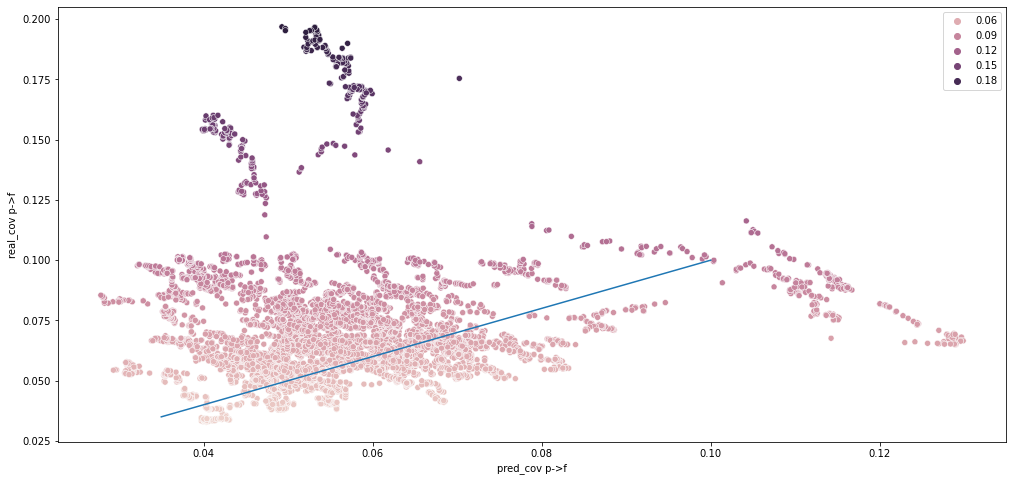

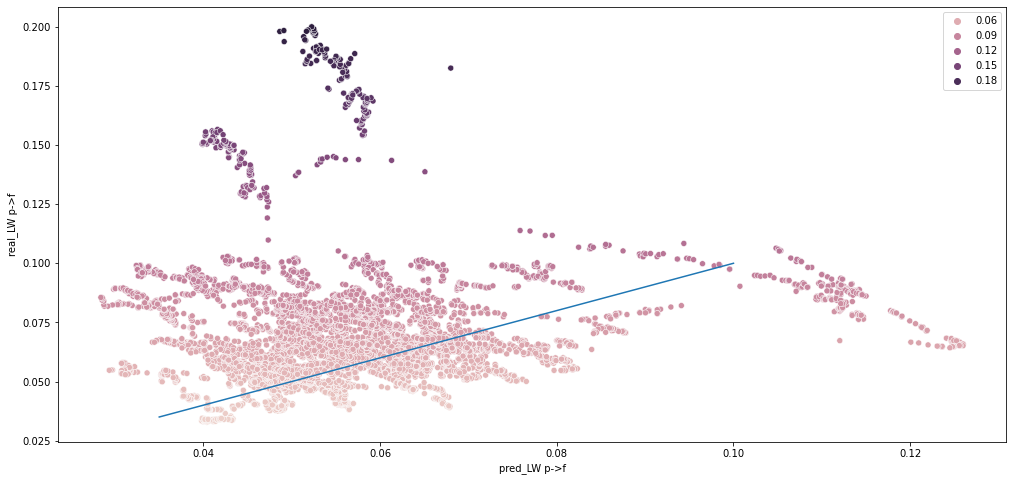

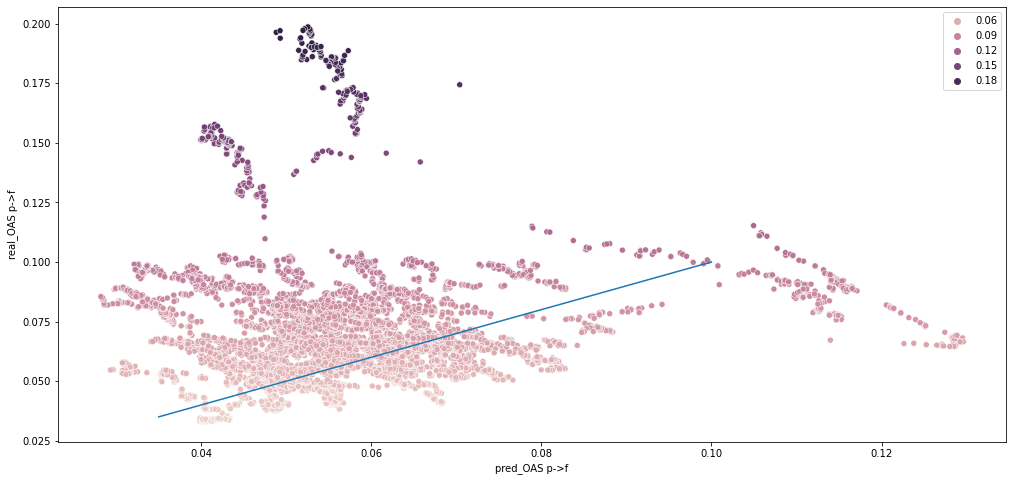

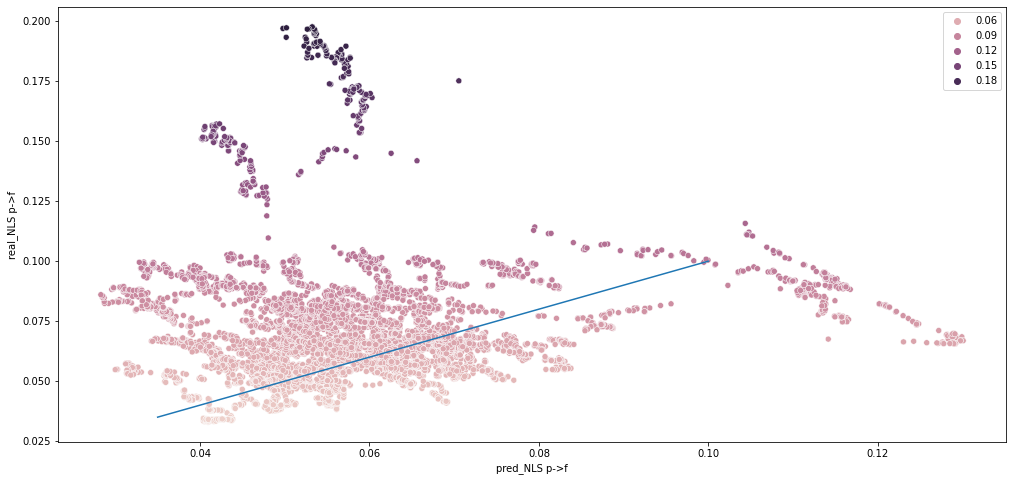

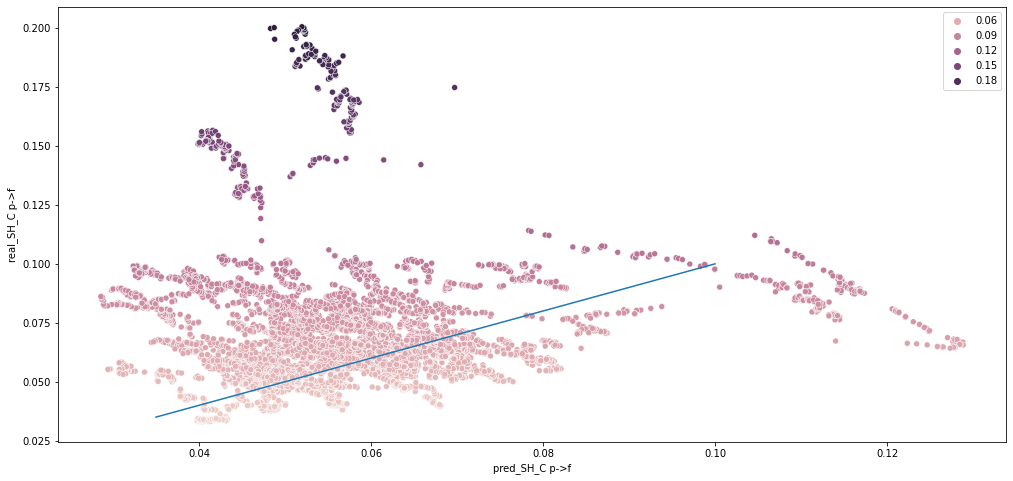

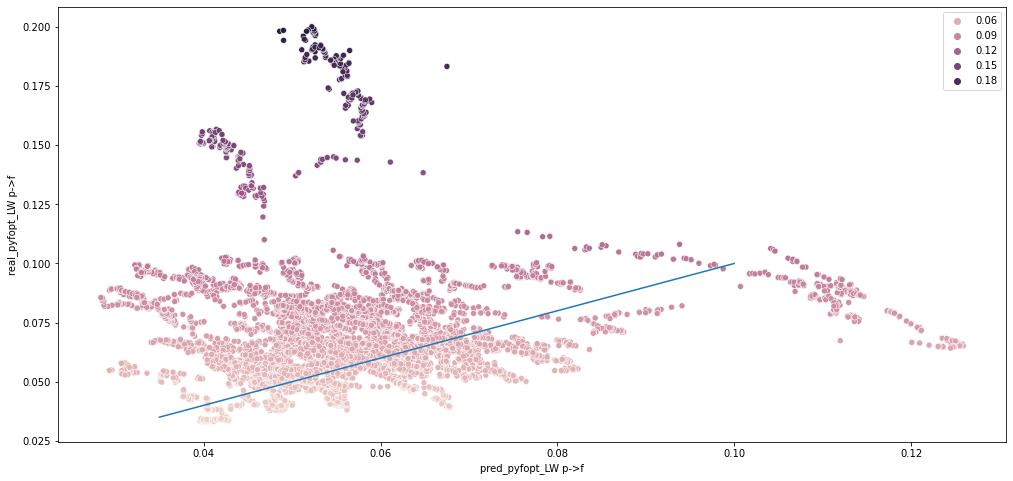

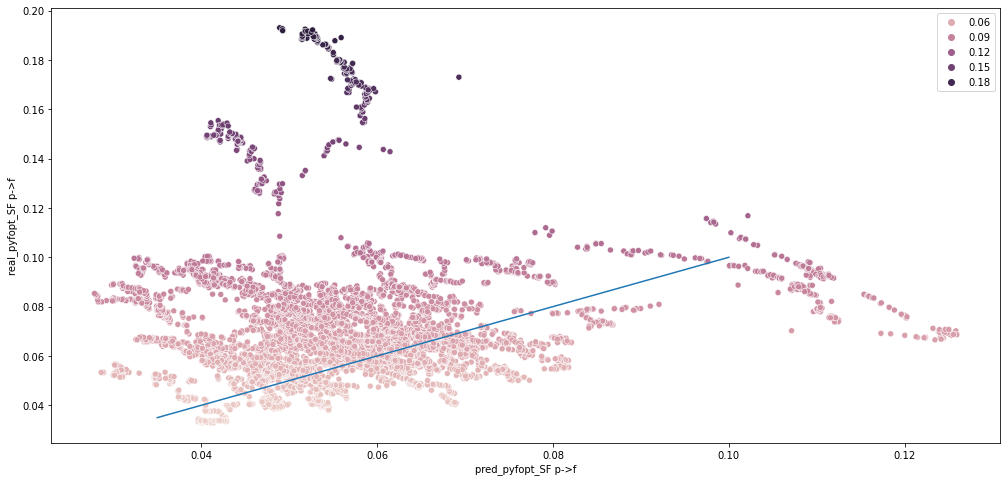

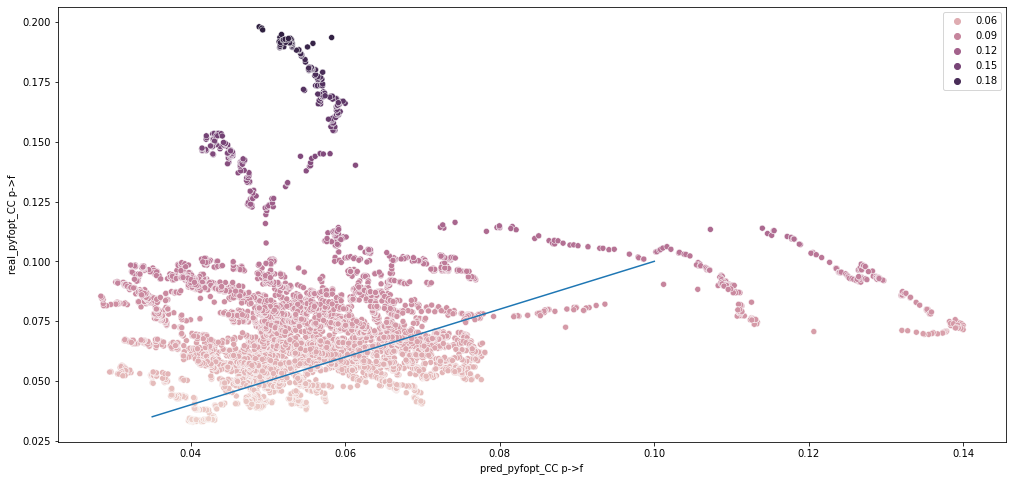

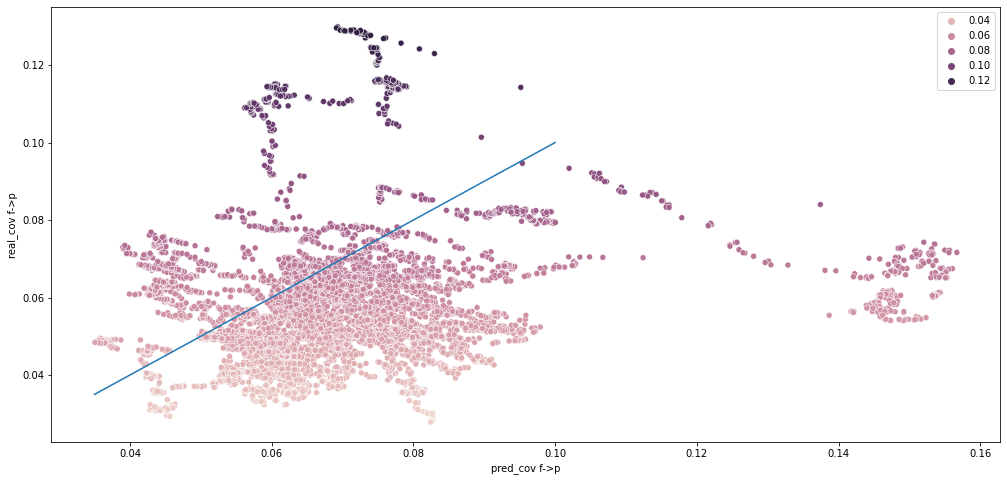

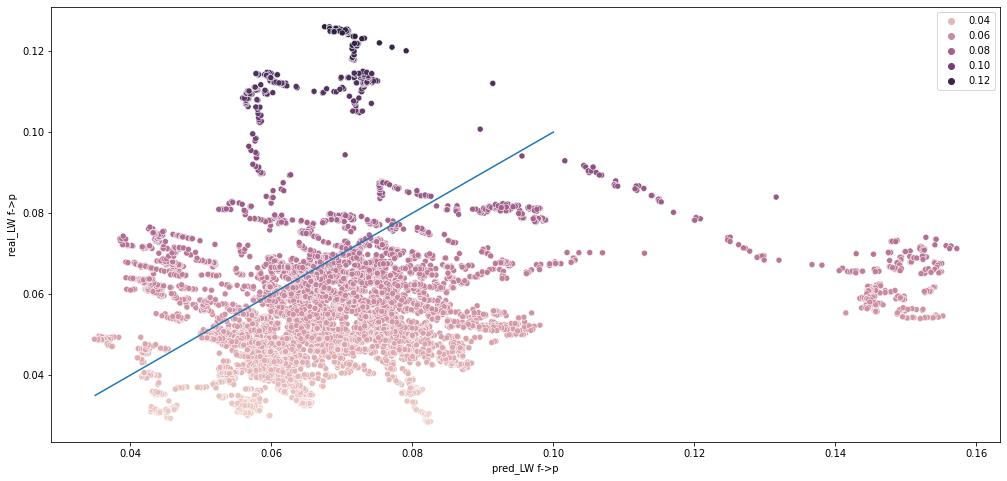

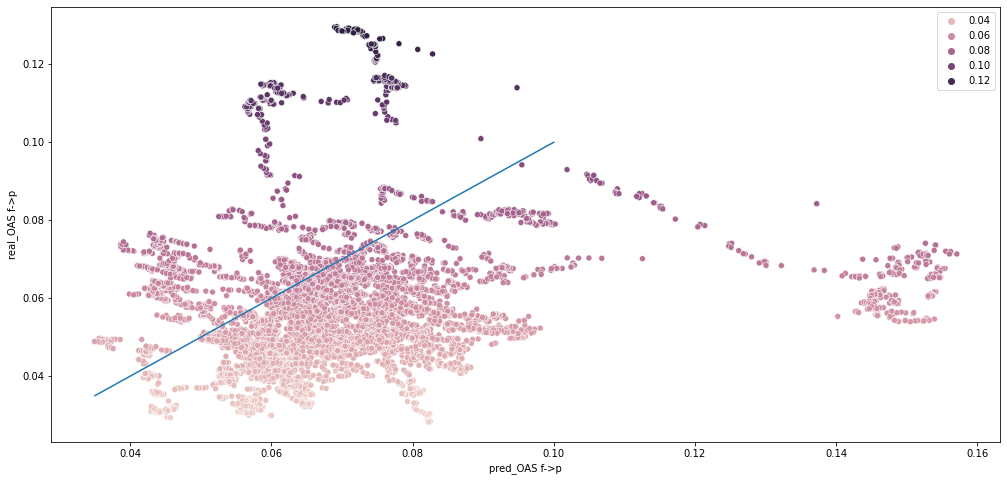

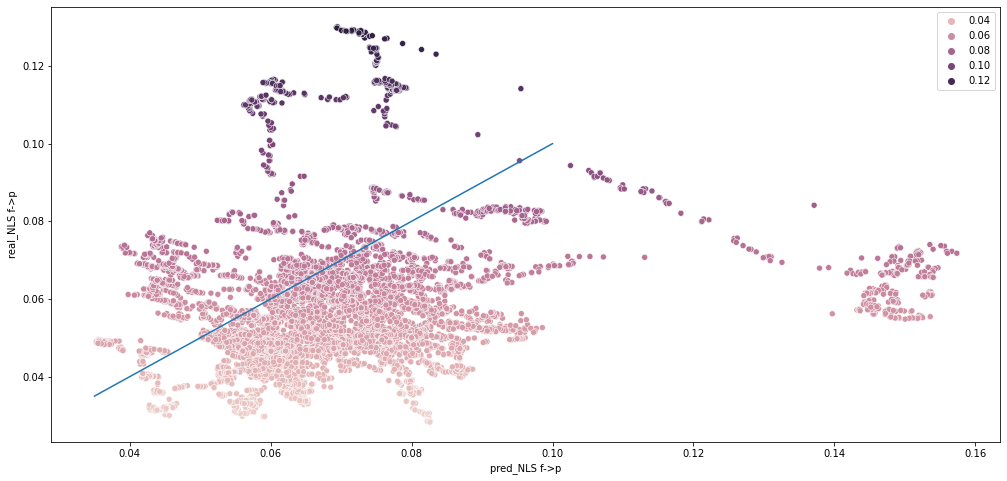

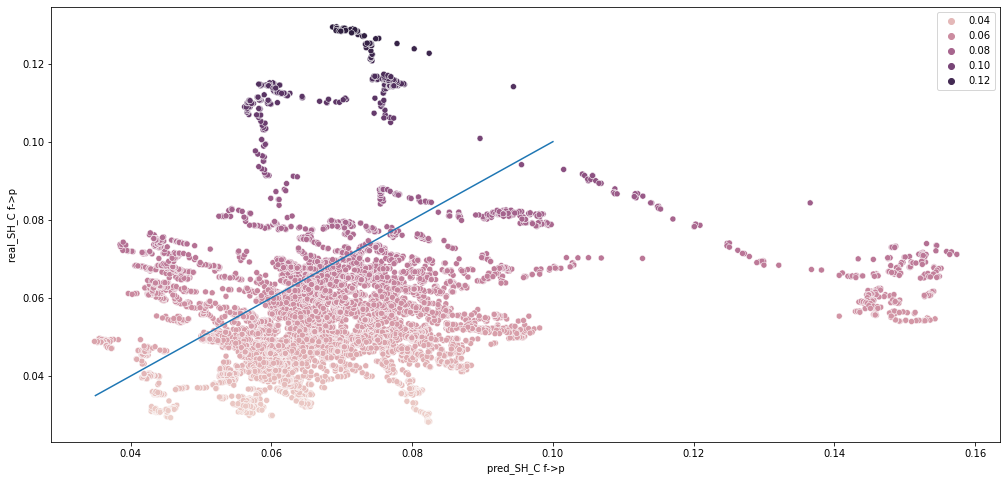

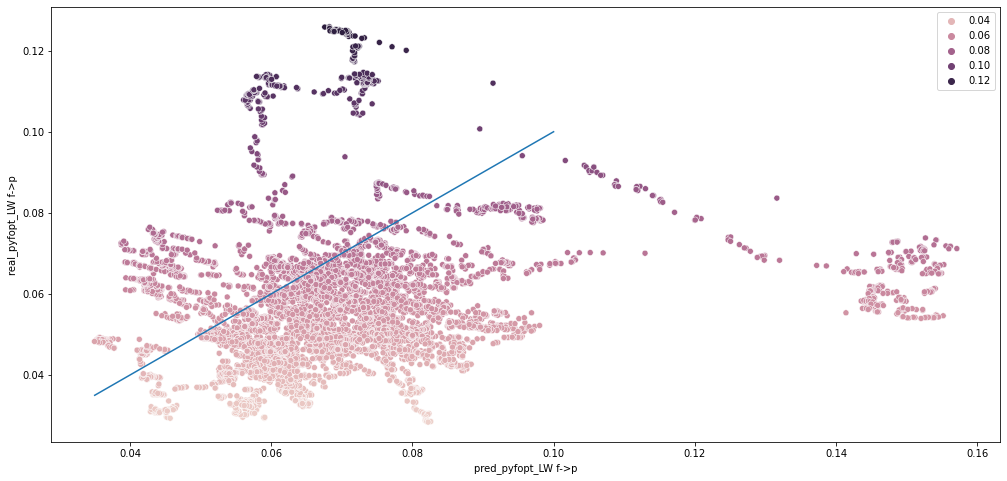

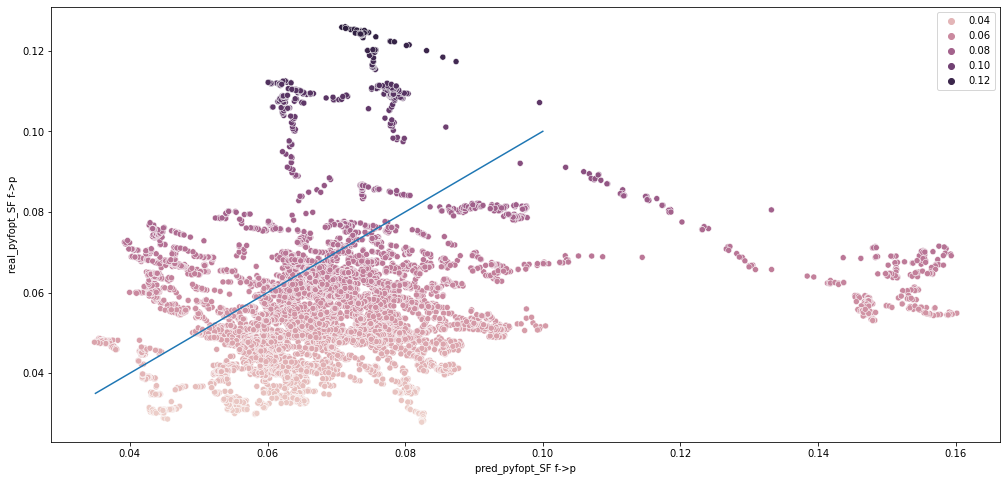

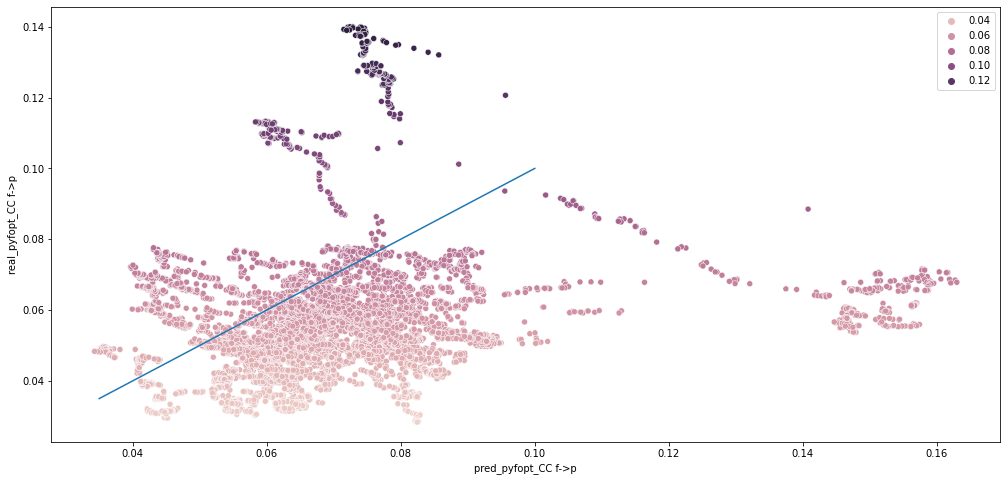

In [78]:
for i in range(0, df_to_scatter.shape[1], 2):
    figure(figsize=(17, 8))
    sns.scatterplot(data = df_to_scatter, x = df_to_scatter.iloc[:, i], y = df_to_scatter.iloc[:, i+1],
                    hue = df_to_scatter.iloc[:, i+1])
    sns.lineplot(x = [0.035, 0.10], y = [0.035, 0.10])

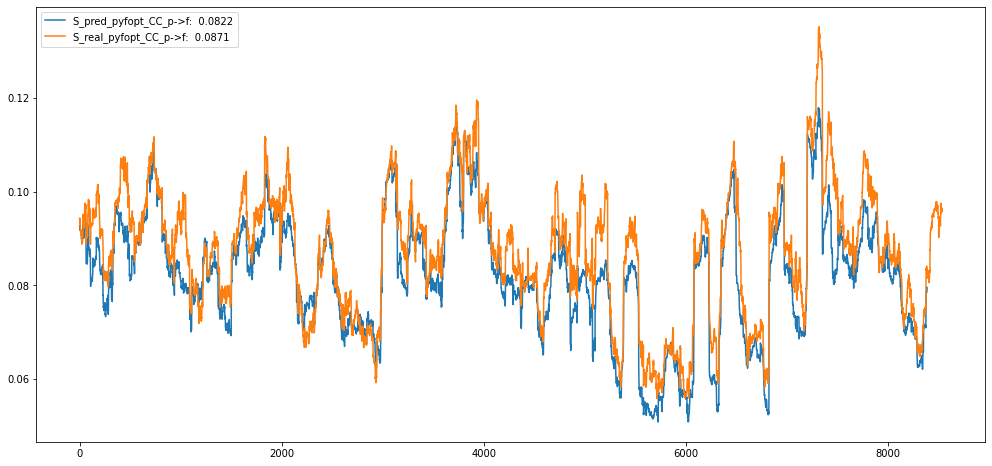

In [139]:
figure(figsize=(17, 8))

# past - > future

# pred - в прошлом, используется для оценки real в будущем

# plot(S_pred_LW_1[win:], label = 'S_pred_LW_p->f:  ' + str("{0:.4f}".format(S_pred_LW_1.mean())))
# plot(S_real_LW_1, label = 'S_real_LW_p->f:  ' + str("{0:.4f}".format(S_real_LW_1.mean())))
# plot(S_pred_cov_1[win:], label = 'S_pred_cov_p->f:  ' + str("{0:.4f}".format(S_pred_cov_1.mean())))
# plot(S_real_cov_1, label = 'S_real_cov_p->f:  ' + str("{0:.4f}".format(S_real_cov_1.mean())))
# plot(S_pred_OAS_1[win:], label = 'S_pred_OAS_p->f:  ' + str("{0:.4f}".format(S_pred_OAS_1.mean())))
# plot(S_real_OAS_1, label = 'S_real_OAS_p->f:  ' + str("{0:.4f}".format(S_real_OAS_1.mean())))
# plot(S_pred_NLS_1[win:], label = 'S_pred_NLS_p->f:  ' + str("{0:.4f}".format(S_pred_NLS_1.mean())))
# plot(S_real_NLS_1, label = 'S_real_NLS_p->f:  ' + str("{0:.4f}".format(S_real_NLS_1.mean())))
# plot(S_pred_SH_C_1[win:], label = 'S_pred_SH_C_p->f:  ' + str("{0:.4f}".format(S_pred_SH_C_1.mean())))
# plot(S_real_SH_C_1, label = 'S_real_SH_C_p->f:  ' + str("{0:.4f}".format(S_real_SH_C_1.mean())))
# plot(S_pred_pyfopt_LW_1[win:], label = 'S_pred_pyfopt_LW_p->f:  ' + str("{0:.4f}".format(S_pred_pyfopt_LW_1.mean())))
# plot(S_real_pyfopt_LW_1, label = 'S_real_pyfopt_LW_p->f:  ' + str("{0:.4f}".format(S_real_pyfopt_LW_1.mean())))
# plot(S_pred_pyfopt_SF_1[win:], label = 'S_pred_pyfopt_SF_p->f:  ' + str("{0:.4f}".format(S_pred_pyfopt_SF_1.mean())))
# plot(S_real_pyfopt_SF_1, label = 'S_real_pyfopt_SF_p->f:  ' + str("{0:.4f}".format(S_real_pyfopt_SF_1.mean())))
plot(S_pred_pyfopt_CC_1[win:], label = 'S_pred_pyfopt_CC_p->f:  ' + str("{0:.4f}".format(S_pred_pyfopt_CC_1.mean())))
plot(S_real_pyfopt_CC_1, label = 'S_real_pyfopt_CC_p->f:  ' + str("{0:.4f}".format(S_real_pyfopt_CC_1.mean())))


# future - > past

# real - в будущем реальное, pred - оцененное по будущему прошлое

# plot(S_pred_LW_2[win:], label = 'S_pred_LW_f->p:  ' + str("{0:.4f}".format(S_pred_LW_2.mean())))
# plot(S_real_LW_2, label = 'S_real_LW_f->p:  ' + str("{0:.4f}".format(S_real_LW_2.mean())))
# plot(S_pred_cov_2[win:], label = 'S_pred_cov_f->p:  ' + str("{0:.4f}".format(S_pred_cov_2.mean())))
# plot(S_real_cov_2, label = 'S_real_cov_f->p:  ' + str("{0:.4f}".format(S_real_cov_2.mean())))
# plot(S_pred_OAS_2[win:], label = 'S_pred_OAS_f->p:  ' + str("{0:.4f}".format(S_pred_OAS_2.mean())))
# plot(S_real_OAS_2, label = 'S_real_OAS_f->p:  ' + str("{0:.4f}".format(S_real_OAS_2.mean())))
# plot(S_pred_NLS_2[win:], label = 'S_pred_NLS_f->p:  ' + str("{0:.4f}".format(S_pred_NLS_2.mean())))
# plot(S_real_NLS_2, label = 'S_real_NLS_f->p:  ' + str("{0:.4f}".format(S_real_NLS_2.mean())))
# plot(S_pred_SH_C_2[win:], label = 'S_pred_SH_C_f->p:  ' + str("{0:.4f}".format(S_pred_SH_C_2.mean())))
# plot(S_real_SH_C_2, label = 'S_real_SH_C_f->p:  ' + str("{0:.4f}".format(S_real_SH_C_2.mean())))
# plot(S_pred_pyfopt_LW_2[win:], label = 'S_pred_pyfopt_LW_f->p:  ' + str("{0:.4f}".format(S_pred_pyfopt_LW_2.mean())))
# plot(S_real_pyfopt_LW_2, label = 'S_real_pyfopt_LW_f->p:  ' + str("{0:.4f}".format(S_real_pyfopt_LW_2.mean())))
# plot(S_pred_pyfopt_SF_2[win:], label = 'S_pred_pyfopt_SF_f->p:  ' + str("{0:.4f}".format(S_pred_pyfopt_SF_2.mean())))
# plot(S_real_pyfopt_SF_2, label = 'S_real_pyfopt_SF_f->p:  ' + str("{0:.4f}".format(S_real_pyfopt_SF_2.mean())))
# plot(S_pred_pyfopt_CC_2[win:], label = 'S_pred_pyfopt_CC_f->p:  ' + str("{0:.4f}".format(S_pred_pyfopt_CC_2.mean())))
# plot(S_real_pyfopt_CC_2, label = 'S_real_pyfopt_CC_f->p:  ' + str("{0:.4f}".format(S_real_pyfopt_CC_2.mean())))

# delta in weights
# 
# plot(delta_w_cov, label = 'delta_w_cov:  ' + str("{0:.4f}".format(delta_w_cov.mean())))
# plot(delta_w_LW, label = 'delta_w_LW:  ' + str("{0:.4f}".format(delta_w_LW.mean())))
# plot(delta_w_OAS, label = 'delta_w_OAS:  ' + str("{0:.4f}".format(delta_w_OAS.mean())))
# plot(delta_w_NLS, label = 'delta_w_NLS:  ' + str("{0:.4f}".format(delta_w_NLS.mean())))
# plot(delta_w_SH_C, label = 'delta_w_SH_C:  ' + str("{0:.4f}".format(delta_w_SH_C.mean())))
# plot(delta_w_pyfopt_LW, label = 'delta_w_pyfopt_LW:  ' + str("{0:.4f}".format(delta_w_pyfopt_LW.mean())))
# plot(delta_w_pyfopt_SF, label = 'delta_w_pyfopt_SF:  ' + str("{0:.4f}".format(delta_w_pyfopt_SF.mean())))
# plot(delta_w_pyfopt_CC, label = 'delta_w_pyfopt_CC:  ' + str("{0:.4f}".format(delta_w_pyfopt_CC.mean())))

legend()
show()

## Найдем квантиль 90 высших точек нормы разности. Для них построим PCA и определим объясняющие вариации

In [110]:
q90_cov = np.quantile(delta_w_cov, 0.90)
q90_LW = np.quantile(delta_w_LW, 0.90)
q90_OAS = np.quantile(delta_w_OAS, 0.90)
q90_NLS = np.quantile(delta_w_NLS, 0.90)
q90_SH_C = np.quantile(delta_w_SH_C, 0.90)
q90_pyfopt_LW = np.quantile(delta_w_pyfopt_LW, 0.90)
q90_pyfopt_SF = np.quantile(delta_w_pyfopt_SF, 0.90)
q90_pyfopt_CC = np.quantile(delta_w_pyfopt_CC, 0.90)

In [111]:
ind_q90_cov = []
ind_q90_LW = []
ind_q90_OAS = []
ind_q90_NLS = []
ind_q90_SH_C = []
ind_q90_pyfopt_LW = []
ind_q90_pyfopt_SF = []
ind_q90_pyfopt_CC = []

for i in range(len(delta_w_cov)):
    if delta_w_cov[i] > q90_cov:
        ind_q90_cov.append(i)

for i in range(len(delta_w_LW)):
    if delta_w_LW[i] > q90_LW:
        ind_q90_LW.append(i)

for i in range(len(delta_w_OAS)):
    if delta_w_OAS[i] > q90_OAS:
        ind_q90_OAS.append(i)
        
for i in range(len(delta_w_NLS)):
    if delta_w_NLS[i] > q90_NLS:
        ind_q90_NLS.append(i)
        
for i in range(len(delta_w_SH_C)):
    if delta_w_SH_C[i] > q90_SH_C:
        ind_q90_SH_C.append(i)
        
for i in range(len(delta_w_pyfopt_LW)):
    if delta_w_pyfopt_LW[i] > q90_pyfopt_LW:
        ind_q90_pyfopt_LW.append(i)
        
for i in range(len(delta_w_pyfopt_SF)):
    if delta_w_pyfopt_SF[i] > q90_pyfopt_SF:
        ind_q90_pyfopt_SF.append(i)
        
for i in range(len(delta_w_pyfopt_CC)):
    if delta_w_pyfopt_CC[i] > q90_pyfopt_CC:
        ind_q90_pyfopt_CC.append(i)
        

In [98]:
# PCA для всех данных

In [99]:
from sklearn.decomposition import PCA

In [112]:
pca_emperical_eigval = [] # eigen values
pca_pred_eigval = []

pca_emperical_expvar = [] # explained variance ratio
pca_pred_expvar = []

for i in tqdm(range(data.shape[0] - (win_predict + win))):
    
    data_empirical = data.iloc[i:i + win]
#     data_empirical_norm = (data_empirical - data_empirical.mean()) / data_empirical.std()
    
    data_pred = data.iloc[i + win : i + win + win_predict]
#     data_pred_norm = (data_pred - data_pred.mean()) / data_pred.std()
    
    pca = PCA(n_components=28)
    pca.fit_transform(data_empirical)
    pca_emperical_eigval.append(pca.explained_variance_)
    pca_emperical_expvar.append(pca.explained_variance_ratio_)
    
    pca = PCA(n_components=28)
    pca.fit_transform(data_pred)
    pca_pred_eigval.append(pca.explained_variance_)
    pca_pred_expvar.append(pca.explained_variance_ratio_)
    

100%|██████████| 8531/8531 [00:25<00:00, 336.44it/s]


In [113]:
pca_pred_expvar[-1]

array([7.39299718e-01, 5.84767692e-02, 4.14580343e-02, 2.48955470e-02,
       1.68625897e-02, 1.43797502e-02, 1.21160891e-02, 1.19452406e-02,
       1.05506728e-02, 9.37043684e-03, 8.19823864e-03, 6.90715601e-03,
       6.21257052e-03, 5.76464934e-03, 4.71872333e-03, 4.52932040e-03,
       4.14157174e-03, 3.47598515e-03, 3.16643862e-03, 3.00726683e-03,
       2.38204288e-03, 2.09075956e-03, 1.49646010e-03, 1.37257533e-03,
       1.00286454e-03, 9.29533718e-04, 6.45003496e-04, 6.03991780e-04])

In [125]:
mean_pca_pred_var = [value[0] for value in pca_pred_expvar]

In [129]:
np.mean(mean_pca_pred_var)

0.5225706944435

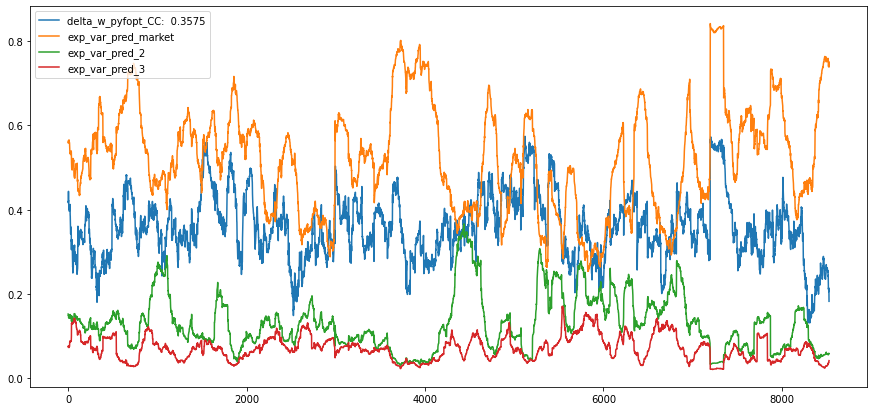

In [114]:
figure(figsize=(15, 7))

# delta in weights
# 
# plot(delta_w_cov, label = 'delta_w_cov:  ' + str("{0:.4f}".format(delta_w_cov.mean())))
# plot(delta_w_LW, label = 'delta_w_LW:  ' + str("{0:.4f}".format(delta_w_LW.mean())))
# plot(delta_w_OAS, label = 'delta_w_OAS:  ' + str("{0:.4f}".format(delta_w_OAS.mean())))
# plot(delta_w_NLS, label = 'delta_w_NLS:  ' + str("{0:.4f}".format(delta_w_NLS.mean())))
# plot(delta_w_SH_C, label = 'delta_w_SH_C:  ' + str("{0:.4f}".format(delta_w_SH_C.mean())))
# plot(delta_w_pyfopt_LW, label = 'delta_w_pyfopt_LW:  ' + str("{0:.4f}".format(delta_w_pyfopt_LW.mean())))
# plot(delta_w_pyfopt_SF, label = 'delta_w_pyfopt_SF:  ' + str("{0:.4f}".format(delta_w_pyfopt_SF.mean())))
plot(delta_w_pyfopt_CC, label = 'delta_w_pyfopt_CC:  ' + str("{0:.4f}".format(delta_w_pyfopt_CC.mean())))

# plot([i[0] for i in pca_pred_eigval], label = 'eig_val_pred_market')
# plot([i[0] for i in pca_emperical_eigval][win:], label = 'eig_val_emperical_market')
plot([i[0] for i in pca_pred_expvar], label = 'exp_var_pred_market')
# plot([i[0] for i in pca_emperical_expvar][win:], label = 'exp_var_emperical_market')

# plot([i[1] for i in pca_pred_eigval], label = 'eig_val_pred_2')
# plot([i[1] for i in pca_emperical_eigval][win:], label = 'eig_val_emperical_2')
plot([i[1] for i in pca_pred_expvar], label = 'exp_var_pred_2')
# plot([i[1] for i in pca_emperical_expvar][win:], label = 'exp_var_emperical_2')

# plot([i[2] for i in pca_pred_eigval], label = 'eig_val_pred_3')
# plot([i[2] for i in pca_emperical_eigval][win:], label = 'eig_val_emperical_3')
plot([i[2] for i in pca_pred_expvar], label = 'exp_var_pred_3')
# plot([i[2] for i in pca_emperical_expvar][win:], label = 'exp_var_emperical_3')

legend()
show()

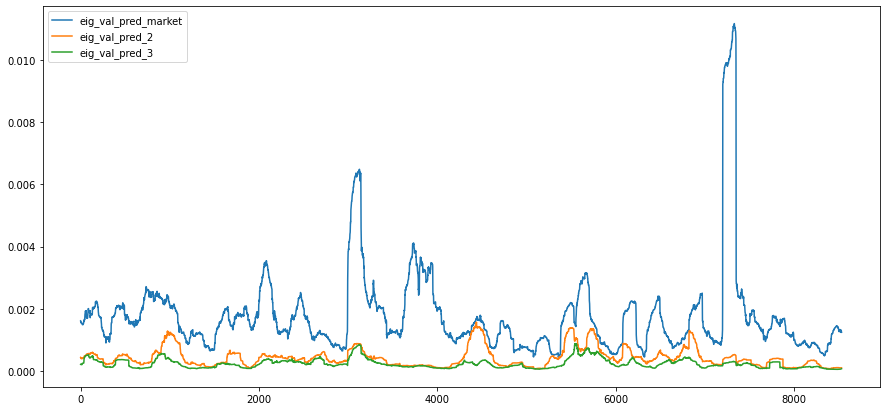

In [115]:
figure(figsize=(15, 7))
plot([i[0] for i in pca_pred_eigval], label = 'eig_val_pred_market')
plot([i[1] for i in pca_pred_eigval], label = 'eig_val_pred_2')
plot([i[2] for i in pca_pred_eigval], label = 'eig_val_pred_3')
legend()
show()

In [116]:
pca_series_eigval0 = [i[0] for i in pca_pred_eigval]
pca_series_expvar0 = [i[0] for i in pca_pred_expvar]
pca_series_eigval1 = [i[1] for i in pca_pred_eigval]
pca_series_expvar1 = [i[1] for i in pca_pred_expvar]

In [117]:
percent_change_eigval0 = np.array(pca_series_eigval0) /  np.array(pca_series_eigval0).mean() * 100
percent_change_expvar0 = np.array(pca_series_expvar0 ) /  np.array(pca_series_expvar0).mean() * 100
percent_change_eigval1 = np.array(pca_series_eigval1) /  np.array(pca_series_eigval1).mean() * 100
percent_change_expvar1 = np.array(pca_series_expvar1) /  np.array(pca_series_expvar1).mean() * 100



In [118]:
val_q90_cov_eigval0 = []
val_q90_LW_eigval0 = []
val_q90_OAS_eigval0 = []
val_q90_NLS_eigval0 = []
val_q90_SH_C_eigval0 = []
val_q90_pyfopt_LW_eigval0 = []
val_q90_pyfopt_SF_eigval0 = []
val_q90_pyfopt_CC_eigval0 = []

val_q90_cov_eigval1 = []
val_q90_LW_eigval1 = []
val_q90_OAS_eigval1 = []
val_q90_NLS_eigval1 = []
val_q90_SH_C_eigval1 = []
val_q90_pyfopt_LW_eigval1 = []
val_q90_pyfopt_SF_eigval1 = []
val_q90_pyfopt_CC_eigval1 = []

val_q90_cov_expvar0 = []
val_q90_LW_expvar0 = []
val_q90_OAS_expvar0 = []
val_q90_NLS_expvar0 = []
val_q90_SH_C_expvar0 = []
val_q90_pyfopt_LW_expvar0 = []
val_q90_pyfopt_SF_expvar0 = []
val_q90_pyfopt_CC_expvar0 = []

val_q90_cov_expvar1 = []
val_q90_LW_expvar1 = []
val_q90_OAS_expvar1 = []
val_q90_NLS_expvar1 = []
val_q90_SH_C_expvar1 = []
val_q90_pyfopt_LW_expvar1 = []
val_q90_pyfopt_SF_expvar1 = []
val_q90_pyfopt_CC_expvar1 = []


for i in ind_q90_cov:
    val_q90_cov_eigval0.append(percent_change_eigval0[i])
    val_q90_cov_eigval1.append(percent_change_eigval1[i])
    val_q90_cov_expvar0.append(percent_change_expvar0[i])
    val_q90_cov_expvar1.append(percent_change_expvar1[i])
    
for i in ind_q90_LW:
    val_q90_LW_eigval0.append(percent_change_eigval0[i])
    val_q90_LW_eigval1.append(percent_change_eigval1[i])
    val_q90_LW_expvar0.append(percent_change_expvar0[i])
    val_q90_LW_expvar1.append(percent_change_expvar1[i])

for i in ind_q90_OAS:
    val_q90_OAS_eigval0.append(percent_change_eigval0[i])
    val_q90_OAS_eigval1.append(percent_change_eigval1[i])
    val_q90_OAS_expvar0.append(percent_change_expvar0[i])
    val_q90_OAS_expvar1.append(percent_change_expvar1[i])
    
for i in ind_q90_NLS:
    val_q90_NLS_eigval0.append(percent_change_eigval0[i])
    val_q90_NLS_eigval1.append(percent_change_eigval1[i])
    val_q90_NLS_expvar0.append(percent_change_expvar0[i])
    val_q90_NLS_expvar1.append(percent_change_expvar1[i])

for i in ind_q90_SH_C:
    val_q90_SH_C_eigval0.append(percent_change_eigval0[i])
    val_q90_SH_C_eigval1.append(percent_change_eigval1[i])
    val_q90_SH_C_expvar0.append(percent_change_expvar0[i])
    val_q90_SH_C_expvar1.append(percent_change_expvar1[i])

for i in ind_q90_pyfopt_LW:
    val_q90_pyfopt_LW_eigval0.append(percent_change_eigval0[i])
    val_q90_pyfopt_LW_eigval1.append(percent_change_eigval1[i])
    val_q90_pyfopt_LW_expvar0.append(percent_change_expvar0[i])
    val_q90_pyfopt_LW_expvar1.append(percent_change_expvar1[i])
    
for i in ind_q90_pyfopt_SF:
    val_q90_pyfopt_SF_eigval0.append(percent_change_eigval0[i])
    val_q90_pyfopt_SF_eigval1.append(percent_change_eigval1[i])
    val_q90_pyfopt_SF_expvar0.append(percent_change_expvar0[i])
    val_q90_pyfopt_SF_expvar1.append(percent_change_expvar1[i])
    
for i in ind_q90_pyfopt_CC:
    val_q90_pyfopt_CC_eigval0.append(percent_change_eigval0[i])
    val_q90_pyfopt_CC_eigval1.append(percent_change_eigval1[i])
    val_q90_pyfopt_CC_expvar0.append(percent_change_expvar0[i])
    val_q90_pyfopt_CC_expvar1.append(percent_change_expvar1[i])
    


In [119]:
np.array(val_q90_pyfopt_CC_expvar0).max()

161.1350121717133

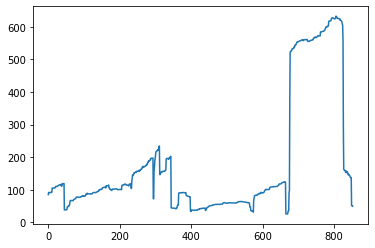

In [120]:
plot(np.array(val_q90_pyfopt_CC_eigval0))

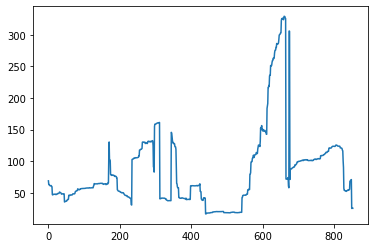

In [121]:
plot(np.array(val_q90_pyfopt_CC_eigval1))

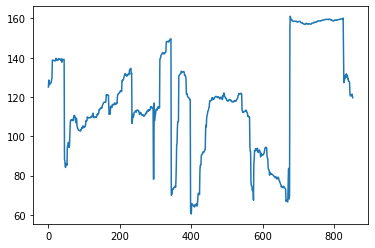

In [122]:
plot(np.array(val_q90_pyfopt_CC_expvar0))

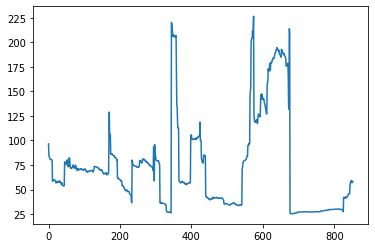

In [123]:
plot(np.array(val_q90_pyfopt_CC_expvar1))

## Описание таблицы

In [124]:
d1 = {'first eigen value min': [np.array(val_q90_cov_eigval0).min(), np.array(val_q90_LW_eigval0).min(), 
                                np.array(val_q90_OAS_eigval0).min(), np.array(val_q90_NLS_eigval0).min(),
                                np.array(val_q90_SH_C_eigval0).min(), np.array(val_q90_pyfopt_LW_eigval0).min(), 
                                np.array(val_q90_pyfopt_SF_eigval0).min(), np.array(val_q90_pyfopt_CC_eigval0).min()], 
     'first eigen value mean': [np.array(val_q90_cov_eigval0).mean(), np.array(val_q90_LW_eigval0).mean(), 
                                np.array(val_q90_OAS_eigval0).mean(), np.array(val_q90_NLS_eigval0).mean(), 
                                np.array(val_q90_SH_C_eigval0).mean(), np.array(val_q90_pyfopt_LW_eigval0).mean(),
                                np.array(val_q90_pyfopt_SF_eigval0).mean(), np.array(val_q90_pyfopt_CC_eigval0).mean()],
     'first eigen value max': [np.array(val_q90_cov_eigval0).max(), np.array(val_q90_LW_eigval0).max(), 
                               np.array(val_q90_OAS_eigval0).max(), np.array(val_q90_NLS_eigval0).max(),
                               np.array(val_q90_SH_C_eigval0).max(), np.array(val_q90_pyfopt_LW_eigval0).max(), 
                               np.array(val_q90_pyfopt_SF_eigval0).max(), np.array(val_q90_pyfopt_CC_eigval0).max()],
     'second eigen value min': [np.array(val_q90_cov_eigval1).min(), np.array(val_q90_LW_eigval1).min(), 
                                np.array(val_q90_OAS_eigval1).min(), np.array(val_q90_NLS_eigval1).min(),
                                np.array(val_q90_SH_C_eigval1).min(), np.array(val_q90_pyfopt_LW_eigval1).min(),
                                np.array(val_q90_pyfopt_SF_eigval1).min(), np.array(val_q90_pyfopt_CC_eigval1).min()], 
     'second eigen value mean': [np.array(val_q90_cov_eigval1).mean(), np.array(val_q90_LW_eigval1).mean(),
                                 np.array(val_q90_OAS_eigval1).mean(), np.array(val_q90_NLS_eigval1).mean(), 
                                 np.array(val_q90_SH_C_eigval1).mean(), np.array(val_q90_pyfopt_LW_eigval1).mean(),
                                 np.array(val_q90_pyfopt_SF_eigval1).mean(), np.array(val_q90_pyfopt_CC_eigval1).mean()],
     'second eigen value max': [np.array(val_q90_cov_eigval1).max(), np.array(val_q90_LW_eigval1).max(),
                                np.array(val_q90_OAS_eigval1).max(), np.array(val_q90_NLS_eigval1).max(), 
                                np.array(val_q90_SH_C_eigval1).max(), np.array(val_q90_pyfopt_LW_eigval1).max(), 
                                np.array(val_q90_pyfopt_SF_eigval1).max(), np.array(val_q90_pyfopt_CC_eigval1).max()],
     'first explained variance min': [np.array(val_q90_cov_expvar0).min(), np.array(val_q90_LW_expvar0).min(), 
                                      np.array(val_q90_OAS_expvar0).min(), np.array(val_q90_NLS_expvar0).min(), 
                                      np.array(val_q90_SH_C_expvar0).min(), np.array(val_q90_pyfopt_LW_expvar0).min(),
                                      np.array(val_q90_pyfopt_SF_expvar0).min(), np.array(val_q90_pyfopt_CC_expvar0).min()],
     'first explained variance mean': [np.array(val_q90_cov_expvar0).mean(), np.array(val_q90_LW_expvar0).mean(), 
                                       np.array(val_q90_OAS_expvar0).mean(), np.array(val_q90_NLS_expvar0).mean(),
                                       np.array(val_q90_SH_C_expvar0).mean(), np.array(val_q90_pyfopt_LW_expvar0).mean(), 
                                       np.array(val_q90_pyfopt_SF_expvar0).mean(), np.array(val_q90_pyfopt_CC_expvar0).mean()],
     'first explained variance max': [np.array(val_q90_cov_expvar0).max(), np.array(val_q90_LW_expvar0).max(),
                                      np.array(val_q90_OAS_expvar0).max(), np.array(val_q90_NLS_expvar0).max(), 
                                      np.array(val_q90_SH_C_expvar0).max(), np.array(val_q90_pyfopt_LW_expvar0).max(), 
                                      np.array(val_q90_pyfopt_SF_expvar0).max(), np.array(val_q90_pyfopt_CC_expvar0).max()],
     'second explained variance min': [np.array(val_q90_cov_expvar1).min(), np.array(val_q90_LW_expvar1).min(), 
                                       np.array(val_q90_OAS_expvar1).min(), np.array(val_q90_NLS_expvar1).min(),
                                       np.array(val_q90_SH_C_expvar1).min(), np.array(val_q90_pyfopt_LW_expvar1).min(), 
                                       np.array(val_q90_pyfopt_SF_expvar1).min(), np.array(val_q90_pyfopt_CC_expvar1).min()],
     'second explained variance mean': [np.array(val_q90_cov_expvar1).mean(), np.array(val_q90_LW_expvar1).mean(), 
                                        np.array(val_q90_OAS_expvar1).mean(), np.array(val_q90_NLS_expvar1).mean(),
                                        np.array(val_q90_SH_C_expvar1).mean(), np.array(val_q90_pyfopt_LW_expvar1).mean(),
                                        np.array(val_q90_pyfopt_SF_expvar1).mean(), np.array(val_q90_pyfopt_CC_expvar1).mean()],
     'second explained variance max': [np.array(val_q90_cov_expvar1).max(), np.array(val_q90_LW_expvar1).max(), 
                                       np.array(val_q90_OAS_expvar1).max(), np.array(val_q90_NLS_expvar1).max(),
                                       np.array(val_q90_SH_C_expvar1).max(), np.array(val_q90_pyfopt_LW_expvar1).max(), 
                                       np.array(val_q90_pyfopt_SF_expvar1).max(), np.array(val_q90_pyfopt_CC_expvar1).max()]}

df_metrics = pd.DataFrame(data=d1, index = ['cov', 'LW', 'OAS', 'NLS', 'SH_C', 'pyfopt_LW', 'pyfopt_SF', 'pyfopt_CC'])
df_metrics

first eigen value min  first eigen value mean  \
cov                    25.789997              172.686813   
LW                     25.789997              164.867413   
OAS                    25.789997              171.978958   
NLS                    25.789997              170.120071   
SH_C                   25.789997              173.660142   
pyfopt_LW              30.519855              167.472756   
pyfopt_SF              25.789997              172.959823   
pyfopt_CC              25.789997              180.791005   

           first eigen value max  second eigen value min  \
cov                   632.198795               16.538898   
LW                    632.198795               16.538898   
OAS                   632.198795               16.538898   
NLS                   632.198795               16.538898   
SH_C                  632.198795               16.371190   
pyfopt_LW             632.198795               16.538898   
pyfopt_SF             632.198795               16.243218   
pyfopt_CC             632.198795               16.371190   

           second eigen value mean  second eigen value max  \
cov                      74.876520              305.393208   
LW                       71.379607              286.133062   
OAS                      75.605676              329.303845   
NLS                      84.473357              329.522123   
SH_C                     79.960908              329.522123   
pyfopt_LW                72.349592              329.303845   
pyfopt_SF                75.729297              287.118333   
pyfopt_CC                84.981345              329.303845   

           first explained variance min  first explained variance mean  \
cov                           64.514388                     118.696198   
LW                            60.512816                     118.962741   
OAS                           60.512816                     116.835570   
NLS                           60.512816                     114.366247   
SH_C                          60.512816                     116.279983   
pyfopt_LW                     60.512816                     119.662749   
pyfopt_SF                     60.512816                     116.907490   
pyfopt_CC                     60.512816                     118.319835   

           first explained variance max  second explained variance min  \
cov                          161.135012                      25.210125   
LW                           159.793860                      26.207518   
OAS                          161.135012                      25.210125   
NLS                          161.135012                      25.210125   
SH_C                         161.135012                      25.210125   
pyfopt_LW                    159.793860                      25.682718   
pyfopt_SF                    161.135012                      25.210125   
pyfopt_CC                    161.135012                      25.210125   

           second explained variance mean  second explained variance max  
cov                             75.937024                     235.943471  
LW                              70.153392                     228.433717  
OAS                             73.840495                     228.433717  
NLS                             78.746975                     228.433717  
SH_C                            73.587680                     228.433717  
pyfopt_LW                       69.361094                     228.433717  
pyfopt_SF                       72.473767                     226.457179  
pyfopt_CC                       73.380252                     226.457179